<style>
    h1{
        text-align: center;
        font-weight: bold;
        background-color: #29BDC1;
        color: white;
        border-radius: 5px;
    }
</style>

<h1>Seoul bike sharing</h1>
<p>
    This dataset contains count of public bikes rented at each hour in Seoul Bike sharing System with the corresponding Weather data and Holidays information. Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. 
</p>
<p>
    The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information. <br>
</p>
<p>
    It is available on <a href="https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand">UCI Machine Learning Repository</a>.
</p>
<p>
    <b>The objective with this dataset is too predict the number of bikes rented at each hour of the day using the other columns so that the city can provide a stable supply of rental bikes.</b>
</p>

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2>Outline</h2>

<ol>
    <li><a href="#1">Importing libraries and data</a></li>
    <li>
        <a href="#2">Data Manipulation</a>
        <ul>
            <li><a href="#2a">Loading the dataset</a></li>
            <li><a href="#2b">Understanding the data</a></li>
            <li><a href="#2c">Preprocessing the data</a></li>
            <ul>
                <li><a href="#2c1">Null Values</a></li>
                <li><a href="#2c2">Unique Values</a></li>
                <li><a href="#2c3">Duplicated Values</a></li>
                <li><a href="#2c4">Outliers</a></li>
            </ul>
        </ul>
    </li>
    <li>
        <a href="#3">Feature Extraction</a>
        <ul>
            <li><a href="#3a">Look at the number of bike rented for functional days and non functional days</a></li>
            <li><a href="#3b">Add new date type columns</a></li>
        </ul>
    </li>
    <li>
        <a href="#4">Exploratory Data Analysis</a>
        <ul>
            <li><a href="#4a">Describe</a></li>
            <li><a href="#4b">Influence that the features have on the number of bikes rented</a></li>
            <li><a href="#4c">Scatter</a></li>
            <li><a href="#4d">Correlation</a></li>
        </ul>
    </li>
    <li>
        <a href="#5">Feature Engineering</a>
        <ul>
            <li><a href="#5a">Feature Encoding</a></li>
            <li><a href="#5b">Transformation of the target variable</a></li>
            <li><a href="#5c">Feature selection</a></li>
            <li><a href="#5d">Splitting data into Train & Test sets</a></li>
            <li><a href="#5e">Feature Scaling</a></li>
        </ul>
    </li>
    <li>
        <a href="#6">Model Building</a>
        <ul>
            <li><a href="#6a">Function to train model</a></li>
            <li><a href="#6b">Function to evaluate performance</a></li>
            <li><a href="#6c">Function to plot</a></li>
            <li><a href="#6d">Linear Regression</a></li>
            <li><a href="#6e">Polynomial Regression</a></li>
            <li><a href="#6f">Lasso Regression</a></li>
            <li><a href="#6g">Ridge Regression</a></li>
            <li><a href="#6h">Decision Tree Regression</a></li>
            <li><a href="#6i">Random Forest Regression</a></li>
            <li><a href="#6k">Gradient Boosting Regression</a></li>
            <li><a href="#6l">Lightgbm and xgboost</a></li>
            <li><a href="#6m">Model Evaluation</a></li>
        </ul>
    </li>
    <li><a href="#7">Flask API for model deployment</a></li>
</ol>

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="1">Importing the libraries</h2>

We first import the necessary libraries for the analysis.

```python

In [6]:
# Data manipulation
import pandas as pd
import numpy as np
import datetime as dt

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Pearson correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


# Train test split
from sklearn.model_selection import train_test_split

# Scaling
from sklearn.preprocessing import StandardScaler

# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Cross validation
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Import warnings
warnings.filterwarnings('ignore')
# Set pandas display option to maximum columns
pd.pandas.set_option('display.max_columns',None)
%matplotlib inline

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="2">Data manipulation</h2>

<h3 id="2a">Loading the dataset "SeoulBikeData.csv"<h3>

To load the dataset "SeoulBikeData.csv" we will use the following pandas method: `pandas.read_csv()`.

```python

In [7]:
file_path = "C:\\Users\\Sascha\\OneDrive\\Desktop\\Seoul Bike Sharing Analysis\\data\\SeoulBikeData.csv"
seoul_bike_sharing_df = pd.read_csv(file_path, encoding='unicode_escape')

In [8]:
# copy the data for backup
seoul_bike_sharing_df_copy = seoul_bike_sharing_df.copy()

<h3 id="2b">Understanding the data</h3>

Before going into the cleaning phase, it is necessary to understand the data that we are working with. We will use some pandas methods to go through the data set and try and understand it.

Let's start by looking at the shape of our dataset:

In [9]:
print("This is the shape of the dataset: {}".format(seoul_bike_sharing_df.shape))
print("The dataset has {} rows and {} columns.".format(seoul_bike_sharing_df.shape[0], seoul_bike_sharing_df.shape[1]))

This is the shape of the dataset: (8760, 14)
The dataset has 8760 rows and 14 columns.


Let's take a look at the first rows of this dataset using the `head()` method.

```python

In [10]:
seoul_bike_sharing_df.head(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

Now let's go ahead and take a look at the last rows of this dataset using the `tail()` method.

```python

In [11]:
seoul_bike_sharing_df.tail(5)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

By looking at the first and last rows of the dataset, we can see that the dataset contains some categorical variables such as `Seasons`, `Holiday`, and `Functioning Day`. We can also see that the dataset contains some numerical variables such as `Rented Bike Count`, `Hour`, `Temperature`, `Humidity`, `Wind speed`, `Visibility`, `Dew point temperature`, `Solar radiation`, `Rainfall` and `Snowfall`.

Let's take a deeper look at the columns of this dataset using the `columns` attribute.

```python

In [12]:
seoul_bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

From this we can see that four features are of type `object`, four are of type `int64` and five are of type `float64`.

In [13]:
seoul_bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

We notice that the columns could use a little bit of renaiming to make them more readable. Having a dataframe that contains column names with spaces or special characters can be a little bit annoying to work with. So let's go ahead and rename the columns of this dataset. 

```python

<h3 id="2c">Preprocessing the data</h3>

In [14]:
renamed_columns = ['date', 'rented_bike_count', 'hour', 'temperature', 'humidity', 
                   'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 
                   'rainfall', 'snowfall', 'seasons', 'holiday', 'functional_day']
seoul_bike_sharing_df.columns = renamed_columns
print("Here are the new columns of the dataframe:\n", seoul_bike_sharing_df.columns)

Here are the new columns of the dataframe:
 Index(['date', 'rented_bike_count', 'hour', 'temperature', 'humidity',
       'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation',
       'rainfall', 'snowfall', 'seasons', 'holiday', 'functional_day'],
      dtype='object')


Here is a small description of each column: <br>

- `Date`: year-month-day (It indicates the date of the rental)
- `Rented Bike count`: Count of bikes rented at each hour
- `Hour`: Hour of the day
- `Temperature`: Weather temperature in Celsius
- `Humidity` - % 
- `Windspeed` - m/s
- `Visibility` - 10m Atmospherical visibility within 10m range
- `Dew point temperature` - Celsius 
- `Solar radiation` - MJ/m2 Indicate light and energy emerged from the sun
- `Rainfall` - mm
- `Snowfall` - cm
- `Seasons`: Winter, Spring, Summer, Autumn
- `Holiday`: Holiday/No holiday
- `Functional Day`: NoFunc(Non Functional Hours), Fun(Functional hours)

Before moving further we can make a few changes to some of the columns. For example, the `Date` column is of type `object` and we would like to convert it to a `datetime` object. We can do this using the `pandas.to_datetime()` method.

```python

In [15]:
seoul_bike_sharing_df['date'] = pd.to_datetime(seoul_bike_sharing_df['date'], format='%d/%m/%Y')

In [16]:
seoul_bike_sharing_df['date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 8760 entries, 0 to 8759
Series name: date
Non-Null Count  Dtype         
--------------  -----         
8760 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 68.6 KB


Some of the columns are categorical in nature. We can handle them in a different way for a better analysis:

1. `Seasons`: This is a nominal categorical variable. You can use label encoding or one-hot encoding to convert this into a binary vector representation. This will create four new columns (one for each season) with binary values indicating the presence of the corresponding season.

2. `Holiday`: This is a binary categorical variable. You can convert this to a numerical representation where 'Holiday' is 1 and 'No holiday' is 0.

3. `Functional Day`: This is also a binary categorical variable. You can convert this to a numerical representation where 'Fun' is 1 and 'NoFunc' is 0.

<h4 id="2c1">Null values</h4>

Let's check if there are any missing values in the data set. We will use the <code>isnull()</code> method to check if there are any missing values in the data set.

In [17]:
seoul_bike_sharing_df.isnull().sum()

date                     0
rented_bike_count        0
hour                     0
temperature              0
humidity                 0
wind_speed               0
visibility               0
dew_point_temperature    0
solar_radiation          0
rainfall                 0
snowfall                 0
seasons                  0
holiday                  0
functional_day           0
dtype: int64

<Axes: >

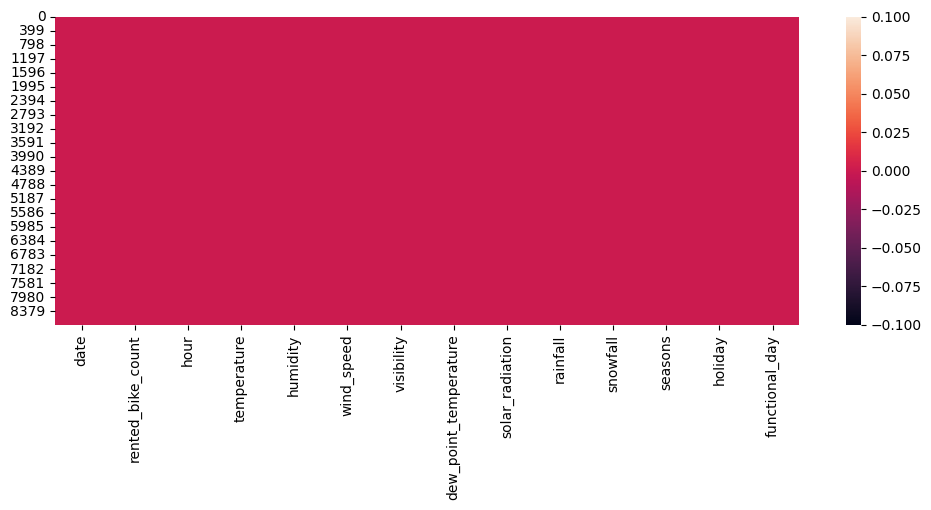

In [18]:
plt.figure(figsize=(12,4))
sns.heatmap(seoul_bike_sharing_df.isnull())

Luckily for us there are no missing values in this dataset. If there were any missing values we would have to deal with them before moving further. We could either drop the rows that contain missing values or fill them with the mean or median of the column.

<h4 id="2c2">Duplicated data</h4>

Duplicate entries can be a problem when working with data. Let's check if there are any duplicate entries in this dataset. We will use the <code>duplicated()</code> method.
```python

In [19]:
print("There a are {} duplicate values in the dataset".format(seoul_bike_sharing_df.duplicated().sum()))

There a are 0 duplicate values in the dataset


No duplicate entries were found in the dataset.

<h4 id="2c3">Unique values<h4>

In [20]:
unique_values_df = seoul_bike_sharing_df.apply(lambda x: len(x.unique()))
unique_values_df

date                      365
rented_bike_count        2166
hour                       24
temperature               546
humidity                   90
wind_speed                 65
visibility               1789
dew_point_temperature     556
solar_radiation           345
rainfall                   61
snowfall                   51
seasons                     4
holiday                     2
functional_day              2
dtype: int64

The unique values that give us the most information are the ones in the categorical columns. We have 4 unique values in the `Seasons` column, 2 unique values in the `Holiday` column and 2 unique values in the `Functional Day` column. 

<h4 id="2c4">Outliers</h4>

In [21]:
#outliers for each numerical column
numerical_features = [feature for feature in seoul_bike_sharing_df.columns if seoul_bike_sharing_df[feature].dtypes != 'O']
numerical_features.remove('date')
numerical_features

['rented_bike_count',
 'hour',
 'temperature',
 'humidity',
 'wind_speed',
 'visibility',
 'dew_point_temperature',
 'solar_radiation',
 'rainfall',
 'snowfall']

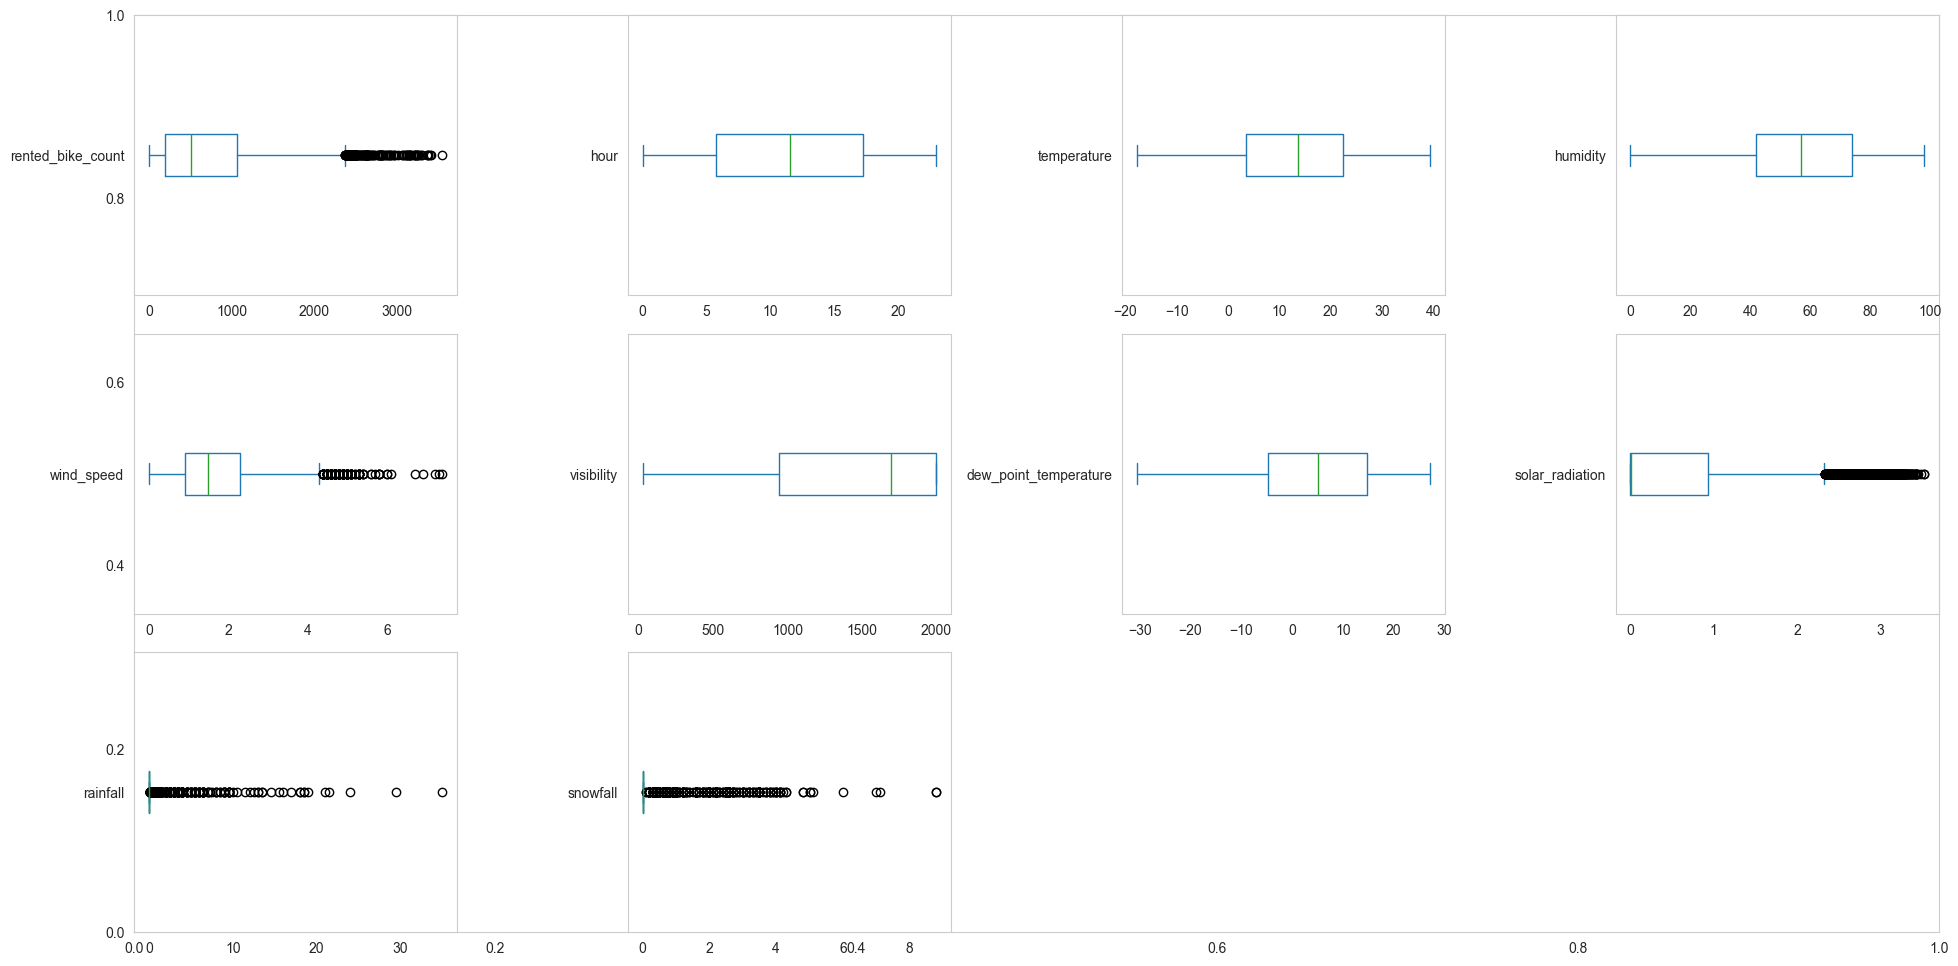

In [22]:
sns.set_style("whitegrid", {'axes.grid' : False})
figure, ax = plt.subplots(figsize=(20,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i+1)
    seoul_bike_sharing_df[feature].plot(kind='box', vert=False)

plt.tight_layout()

We notice from these boxplots that there are multiple outliers for some of the features. However, the concerned features are mostly related to weather conditions. We will not remove these outliers because they are not errors in the data. They are just extreme values that are not very common.

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="3">Feature extraction</h2>

<h3 id="3a">Looking at the number of rented bikes for functional days</h3>

<Axes: xlabel='hour', ylabel='rented_bike_count'>

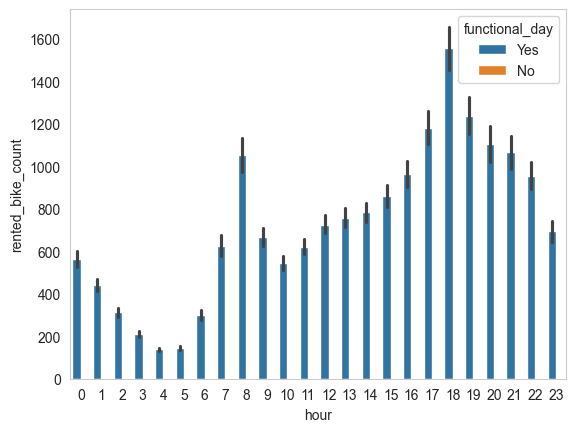

In [23]:
sns.barplot(data=seoul_bike_sharing_df, x='hour', y='rented_bike_count', hue='functional_day')

In [24]:
# sum of rented bikes per functional day
seoul_bike_sharing_df.groupby('functional_day')['rented_bike_count'].sum()

functional_day
No           0
Yes    6172314
Name: rented_bike_count, dtype: int64

We quickly understand that there is no need to keep the `Functioning Day` column since it is always `Yes` and rented bikes are only given out during functional days. First we remove data of non functional days then drop this column.

In [25]:
# Save all the days where the bikes are functional 
seoul_bike_sharing_df = seoul_bike_sharing_df[seoul_bike_sharing_df['functional_day'] == "Yes"]

In [26]:
# Drop the functional_day column as it is no longer necessary
seoul_bike_sharing_df.drop('functional_day', inplace=True, axis=1)

In [27]:
# Look at the new shape of the dataframe
print("This is the new shape of the dataset: {}".format(seoul_bike_sharing_df.shape))
print("The new dataset has {} rows and {} columns.".format(seoul_bike_sharing_df.shape[0], seoul_bike_sharing_df.shape[1]))

This is the new shape of the dataset: (8465, 13)
The new dataset has 8465 rows and 13 columns.


<h3 id="3b">Add new columns days, months, and years.</h3>

For the visualization part we will directly put the names of the months and days in the graphs. However, for the machine learning part we will need to convert these names into numbers. We will create three new columns: `day`, `month` and `year` and fill them with the corresponding values.

In [28]:
# Get the year
years = list(seoul_bike_sharing_df['date'].dt.year)

# Get the month
months_list = list(seoul_bike_sharing_df['date'].dt.month)

# Create a dictionary associating each number to a month
month_dictionary = {
    1: 'January',
    2: 'February',
    3: 'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September', 
    10:'October',
    11:'November',
    12:'December'
}
# Get a new list with the name of the months instead of the numbers
months = [month_dictionary[month] for month in months_list]

# Get the day & weekends
days_list = list(seoul_bike_sharing_df['date'].dt.day_of_week)

# Create a dictionary with the name of the days
day_dictionary = {
    0:'Monday',
    1:'Tuesday',
    2:'Wednesday',
    3:'Thursday',
    4:'Friday',
    5:'Saturday',
    6:'Sunday' 
}
# Get a new list with the name of the days instead of the numbers
days = [day_dictionary[day] for day in days_list]

In [29]:
# Add the new information to the dataframe 
seoul_bike_sharing_df['years'] = years
seoul_bike_sharing_df['months'] = months
seoul_bike_sharing_df['days'] = days

# Drop the date column as it is no longer needed 
seoul_bike_sharing_df.drop(columns=['date'], inplace=True)

In [30]:
# Look at the new shape of the dataframe
print("This is the new shape of the dataset: {}".format(seoul_bike_sharing_df.shape))
print("The new dataset has {} rows and {} columns.".format(seoul_bike_sharing_df.shape[0], seoul_bike_sharing_df.shape[1]))

This is the new shape of the dataset: (8465, 15)
The new dataset has 8465 rows and 15 columns.


<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="4">Exploratory Data Analysis (EDA)</h2>

<h3 id="4a">Describe</h3>

In [31]:
seoul_bike_sharing_df.describe().T

count         mean         std     min     25%  \
rented_bike_count      8465.0   729.156999  642.351166     2.0   214.0   
hour                   8465.0    11.507029    6.920899     0.0     6.0   
temperature            8465.0    12.771057   12.104375   -17.8     3.0   
humidity               8465.0    58.147194   20.484839     0.0    42.0   
wind_speed             8465.0     1.725883    1.034281     0.0     0.9   
visibility             8465.0  1433.873479  609.051229    27.0   935.0   
dew_point_temperature  8465.0     3.944997   13.242399   -30.6    -5.1   
solar_radiation        8465.0     0.567868    0.868245     0.0     0.0   
rainfall               8465.0     0.149120    1.125540     0.0     0.0   
snowfall               8465.0     0.077685    0.444063     0.0     0.0   
years                  8465.0  2017.912109    0.283154  2017.0  2018.0   

                           50%      75%      max  
rented_bike_count       542.00  1084.00  3556.00  
hour                     12.00    18.00    23.00  
temperature              13.50    22.70    39.40  
humidity                 57.00    74.00    98.00  
wind_speed                1.50     2.30     7.40  
visibility             1690.00  2000.00  2000.00  
dew_point_temperature     4.70    15.20    27.20  
solar_radiation           0.01     0.93     3.52  
rainfall                  0.00     0.00    35.00  
snowfall                  0.00     0.00     8.80  
years                  2018.00  2018.00  2018.00

The ranges of values in the numerical columns seem reasonable. As we said when we were looking at the outliers, The `wind_speed`, `dew_point_temperature`, `solar_radiation`, `rainfall` and `snowfall` column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value. <br>

Looking at the statistics of our data set we can see that the max rented bike count for an hour in this data set is 3556. Which is pretty much considering the mean rented bike count for an hour which is equal to 704, so 5 times the mean.

<h3 id="4b">Influence that the features have on the number of bikes rented</h3>

If this was not stated from the beginning, the target variable for this data set willl be our `Rented Bike Count` column. The rest of the features in this data set will help us understand the influence that they have on the number of bikes rented. During this Exploratory Data Analysis (EDA) we will try to visualize the influence that each feature has on the number of bikes rented.

Before starting the EDA, let's seperate the numerical columns from the categorical columns. This will help us visualize the data better.

```python

In [32]:
# Create seperate lists for the numerical and categorical features
numerical_features = [feature for feature in seoul_bike_sharing_df.columns if seoul_bike_sharing_df[feature].dtypes != 'O']
categorical_features = [feature for feature in seoul_bike_sharing_df.columns if seoul_bike_sharing_df[feature].dtypes == 'O']

In [33]:
print("Here are the numerical features:\n", numerical_features)
print()
print("Here are the categorical features:\n",categorical_features)

Here are the numerical features:
 ['rented_bike_count', 'hour', 'temperature', 'humidity', 'wind_speed', 'visibility', 'dew_point_temperature', 'solar_radiation', 'rainfall', 'snowfall', 'years']

Here are the categorical features:
 ['seasons', 'holiday', 'months', 'days']


<h4>What does the distribution for each numerical column look like?</h4>

```python

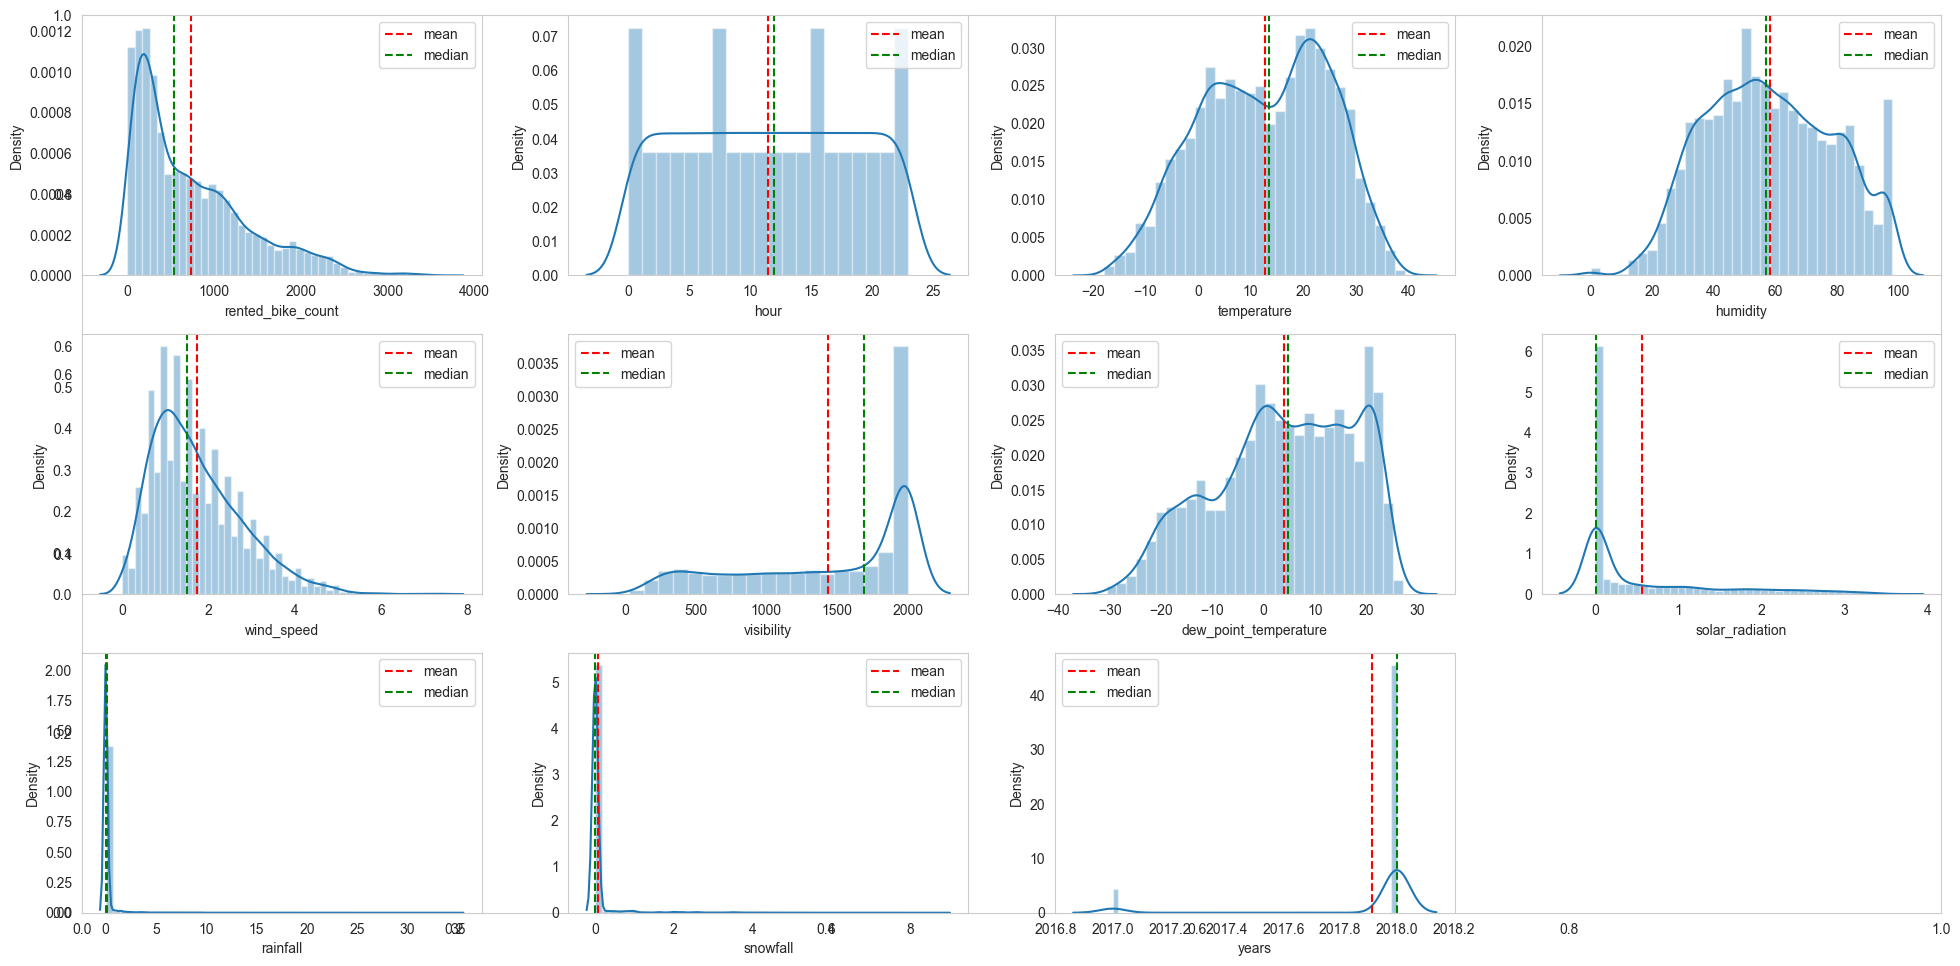

In [34]:
figure, ax = plt.subplots(figsize=(20,10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 4, i+1)
    sns.distplot(seoul_bike_sharing_df[feature])
    plt.axvline(x=np.mean(seoul_bike_sharing_df[feature]), c='red', ls='--', label='mean')
    plt.axvline(x=np.median(seoul_bike_sharing_df[feature]), c='green', ls='--', label='median')
    plt.legend()
    plt.xlabel(feature)

plt.tight_layout()

From the histograms we can observe that the `Rented Bike Count` column is skewed to the right. This means that most of the values are concentrated on the left side of the histogram. Other columns that are also skewed to the right are the `wind_speed`, `solar_radiation`, `rainfall`, and `snowfall` columns. For these columns the mean is greater than the median meaning that the mean overestimates the most common values in a positively skewed distribution.<br>

We can also observe that the `Hour` column has a sort of uniform distribution although there are distinct peaks representing the hours where people mostly use the bikes. The column `humidity` appears to have a normal distribution. This means that the mean and median are almost equal. <br>

The `temperature`, and `dew_point_temperature` columns appear to be bimodal and multimodal. This means that there is more than one peak for the distributions but there is no skew.<br>

TFinally he `visibility` and `year` columns are also skewed to the left. This means that most of the values are concentrated on the right side of the histogram and that the median is greater than the mean.<br>

Since the presence of skews indicate that their is the presence of outliers it can affect statistical analyses that assume normality and may require transformation of the data before conducting certain analyses.

<h4>What are the moments where people rent the most bikes?</h4>

Let's look at the time stamp variables such as `year`, `month`, `day`, and `hour` to see if we can find any patterns.

```python

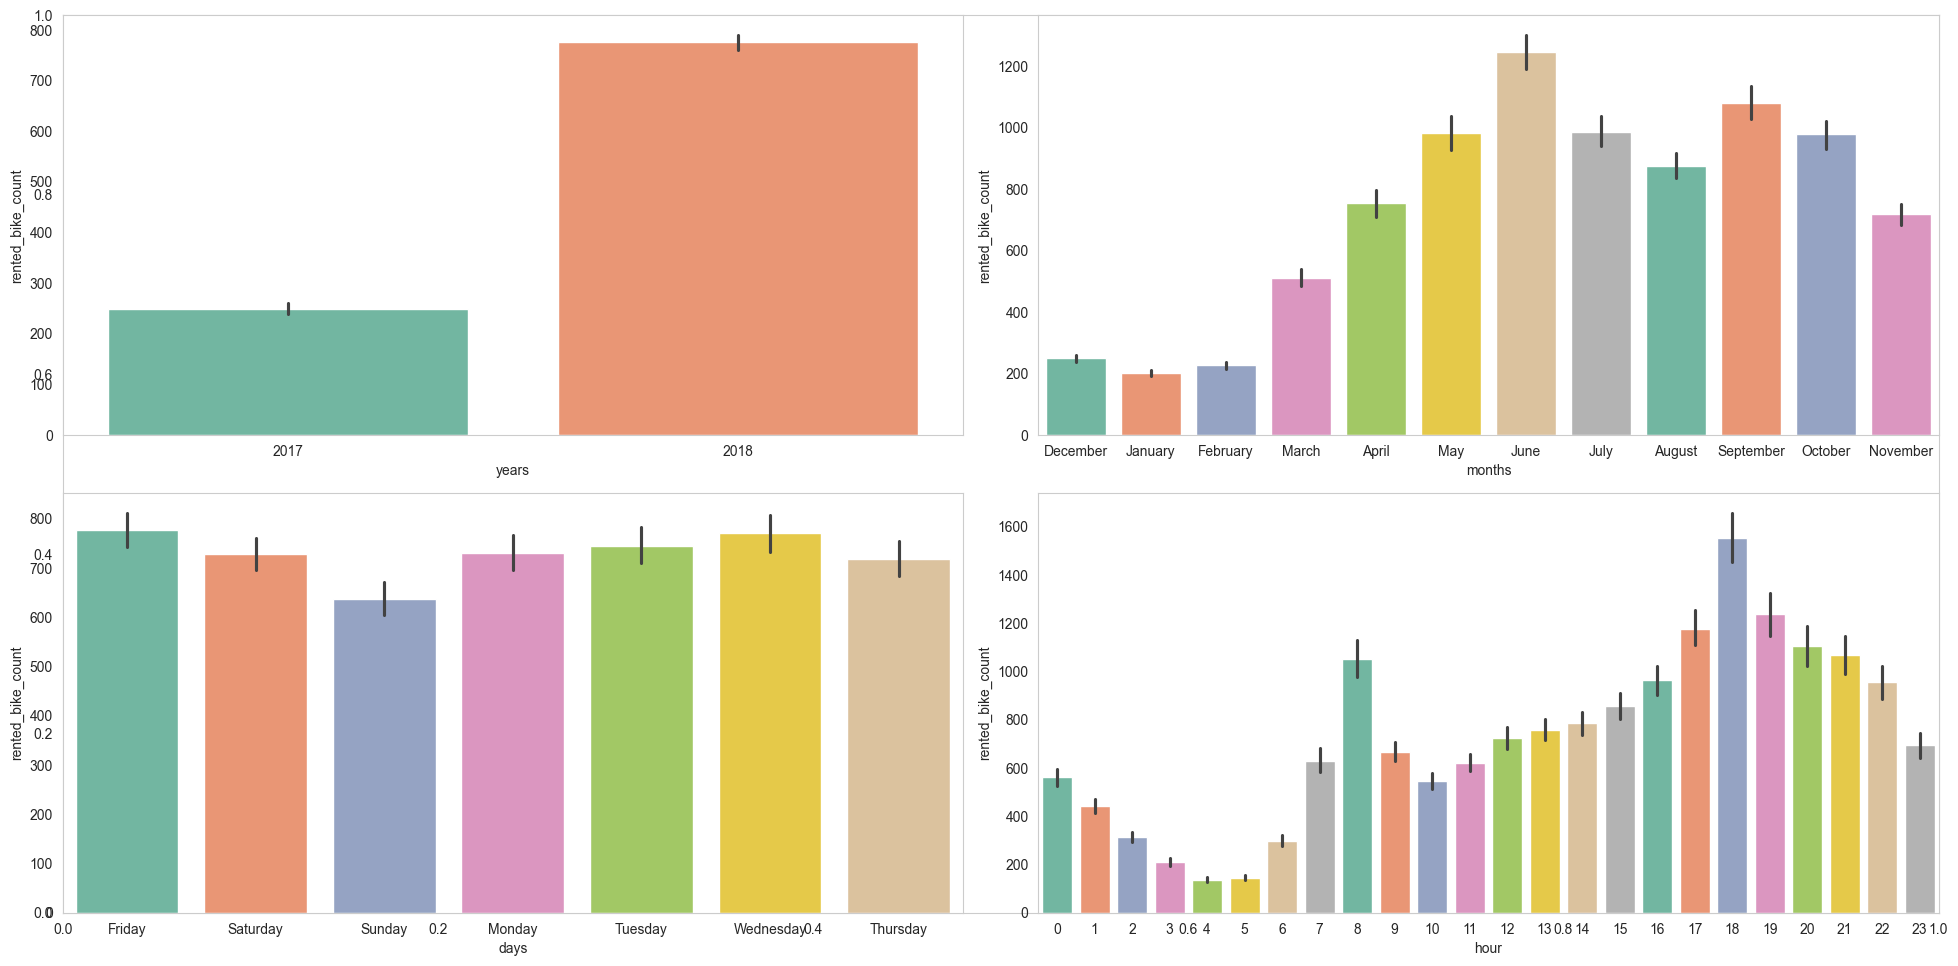

In [35]:
# Create a dataframe with just the time stamp features
time_stamp_df = seoul_bike_sharing_df[['years', 'months', 'days', 'hour']]

# Create visualizations with the total number of bikes rented per year, month, day and hour on the y-axis and the year, month, day and hour on the x-axis
figure, ax = plt.subplots(figsize=(20,10))
plt.subplot(2, 2, 1)
sns.barplot(data=seoul_bike_sharing_df, x='years', y='rented_bike_count', palette='Set2')
plt.subplot(2, 2, 2)
sns.barplot(data=seoul_bike_sharing_df, x='months', y='rented_bike_count', palette='Set2')
plt.subplot(2, 2, 3)
sns.barplot(data=seoul_bike_sharing_df, x='days', y='rented_bike_count', palette='Set2')
plt.subplot(2, 2, 4)
sns.barplot(data=seoul_bike_sharing_df, x='hour', y='rented_bike_count', palette='Set2')

plt.tight_layout()

We notice from these bar plots that the number of bikes rented is higher during the months of  <b>June, July, and September</b>. This is probably because the weather is warmer during these months. The months with the least number of rented bikes is **December, January, and February** probably because the weather is colder. We will later confirm this by looking at the analysis of categorical features. <br>

We also notice that the number of bikes rented is higher during the hours of **8, 17, 18, and 19**. This is probably because people are going to work or coming back from work during these hours.<br>

Also people **rent more during the weekdays** than during the weekends. This is probably because people use the bikes to go to work during the weekdays.<br>

Other than that we can also notice that there is a slight increase in the number of bikes rented during the year **2018**. This is probably because the bike sharing system become more popular or the data started to record late in 2017. 

<Axes: title={'center': 'Temperature repartition in a day'}, xlabel='hour', ylabel='temperature'>

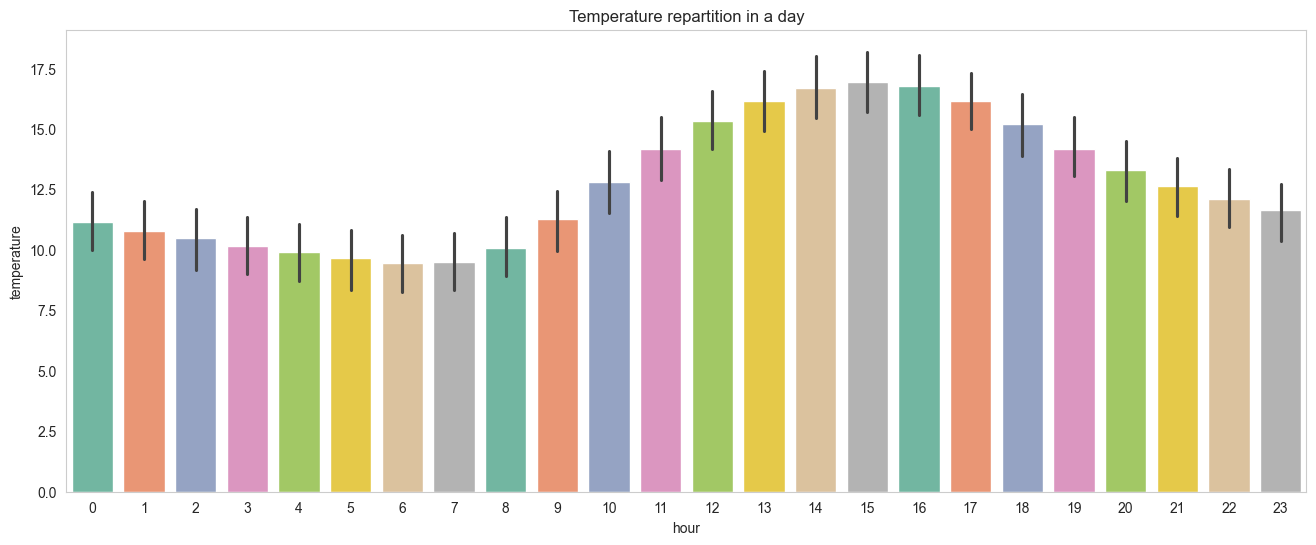

In [36]:

plt.figure(figsize=(16,6))
plt.title("Temperature repartition in a day")
sns.barplot(data=seoul_bike_sharing_df,x="hour",y="temperature",palette="Set2")

With those plots we can also see that people do not necessarily use bikes during the warmer period of the day.

<h4>Exploring our categorical features</h4>

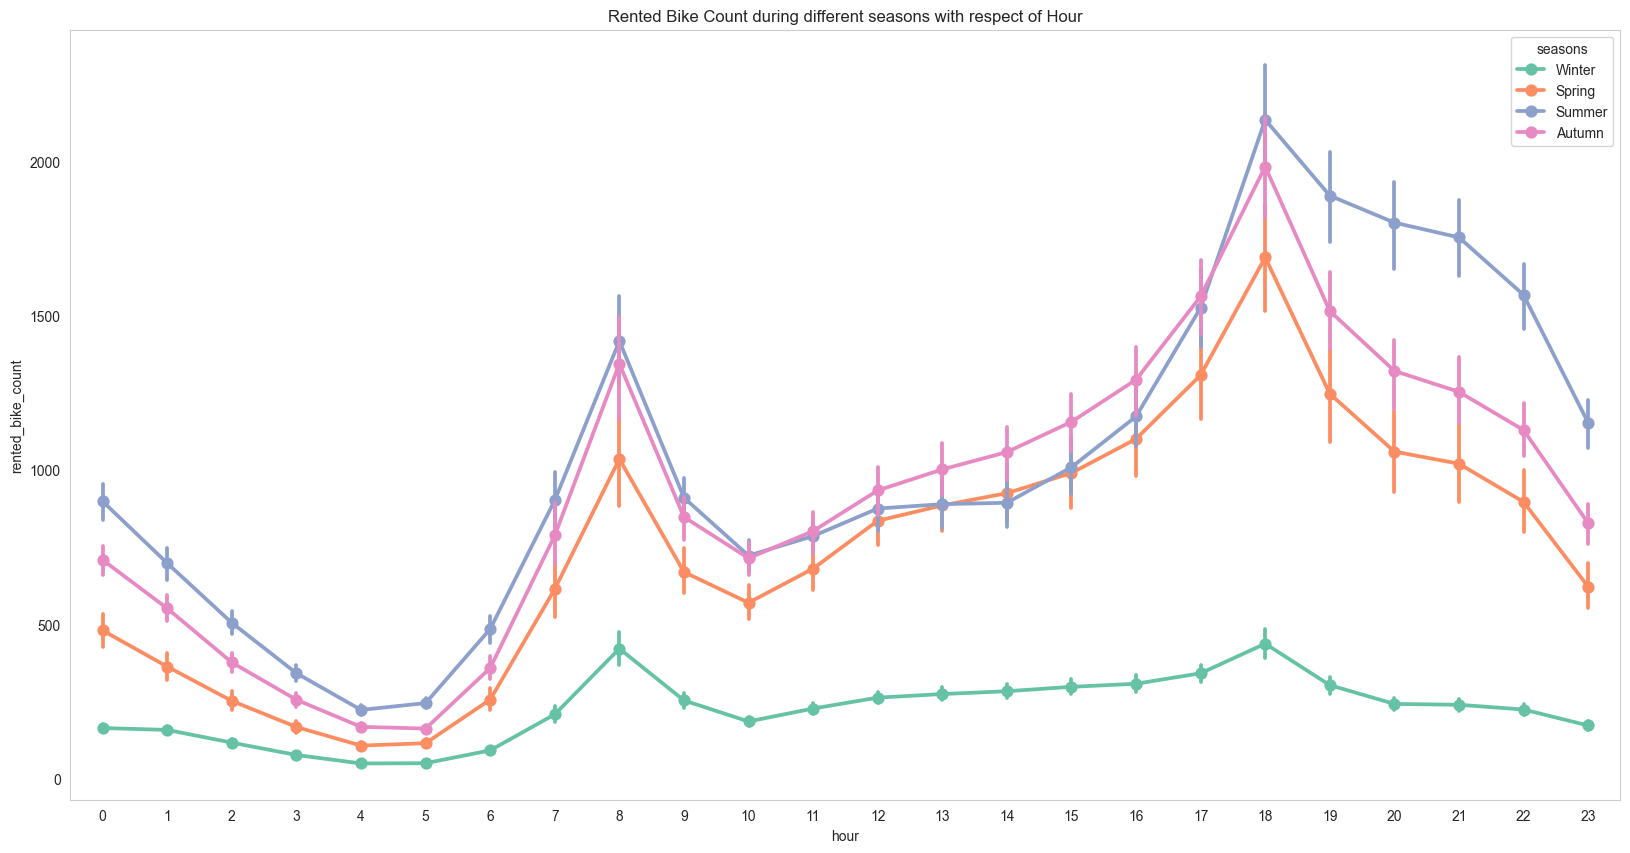

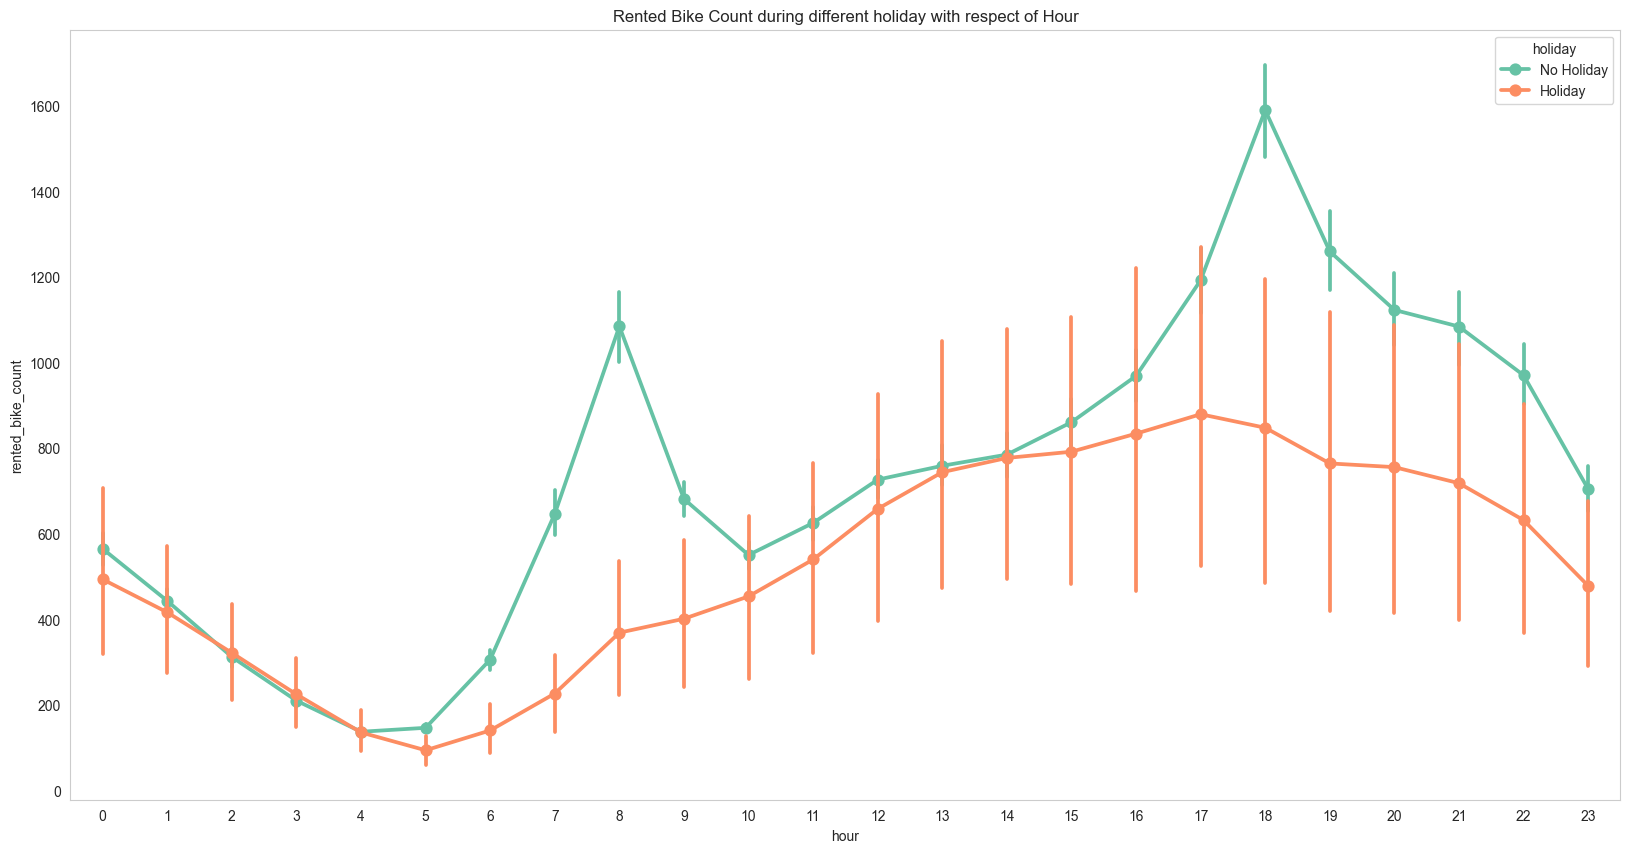

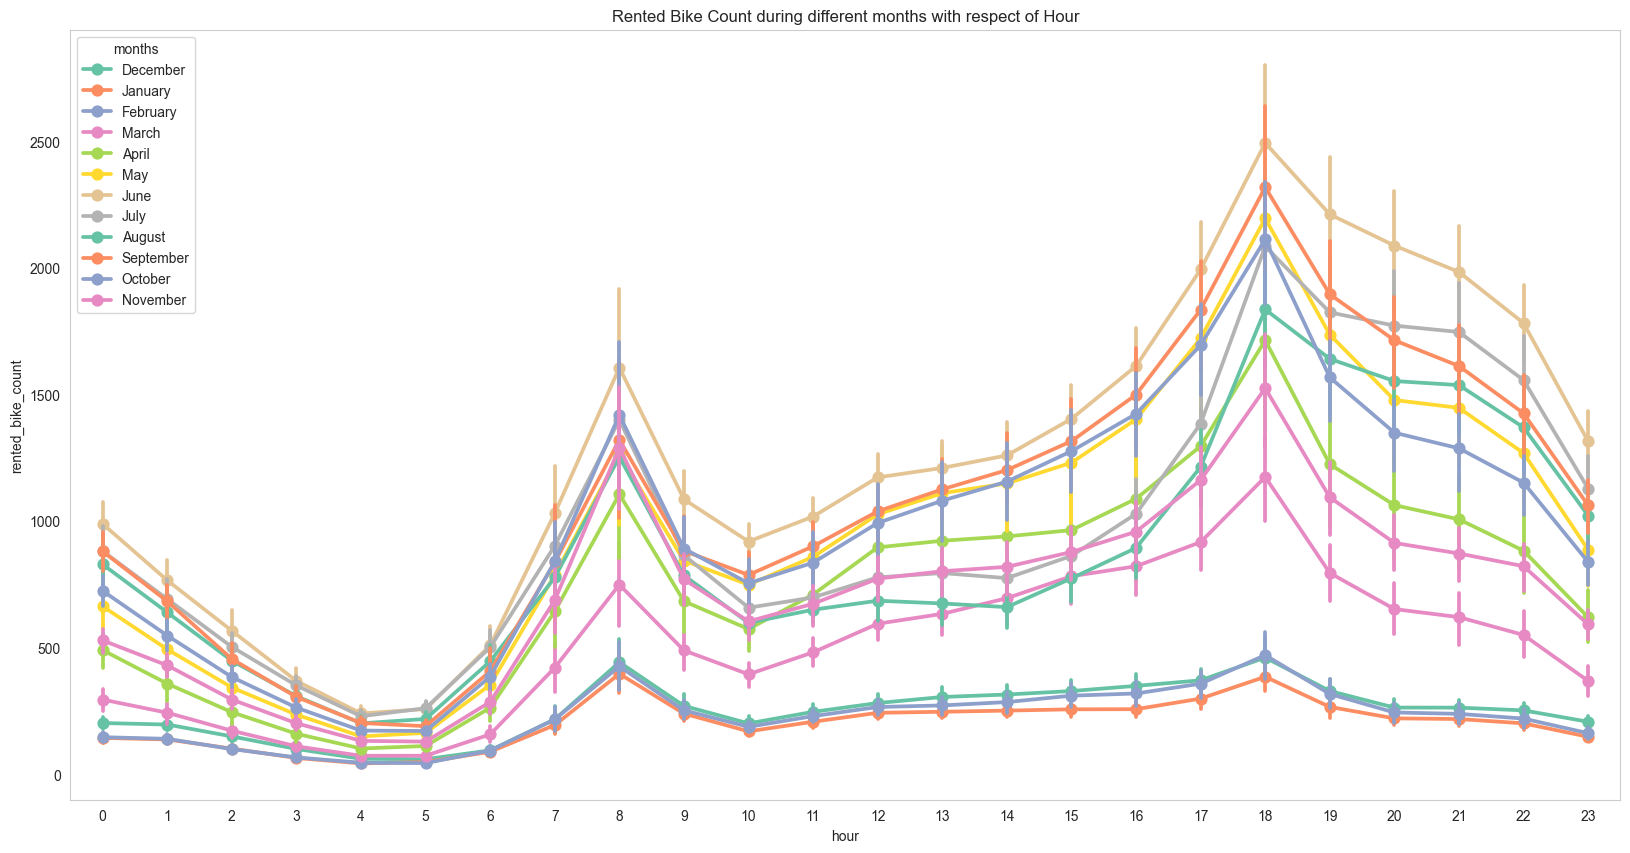

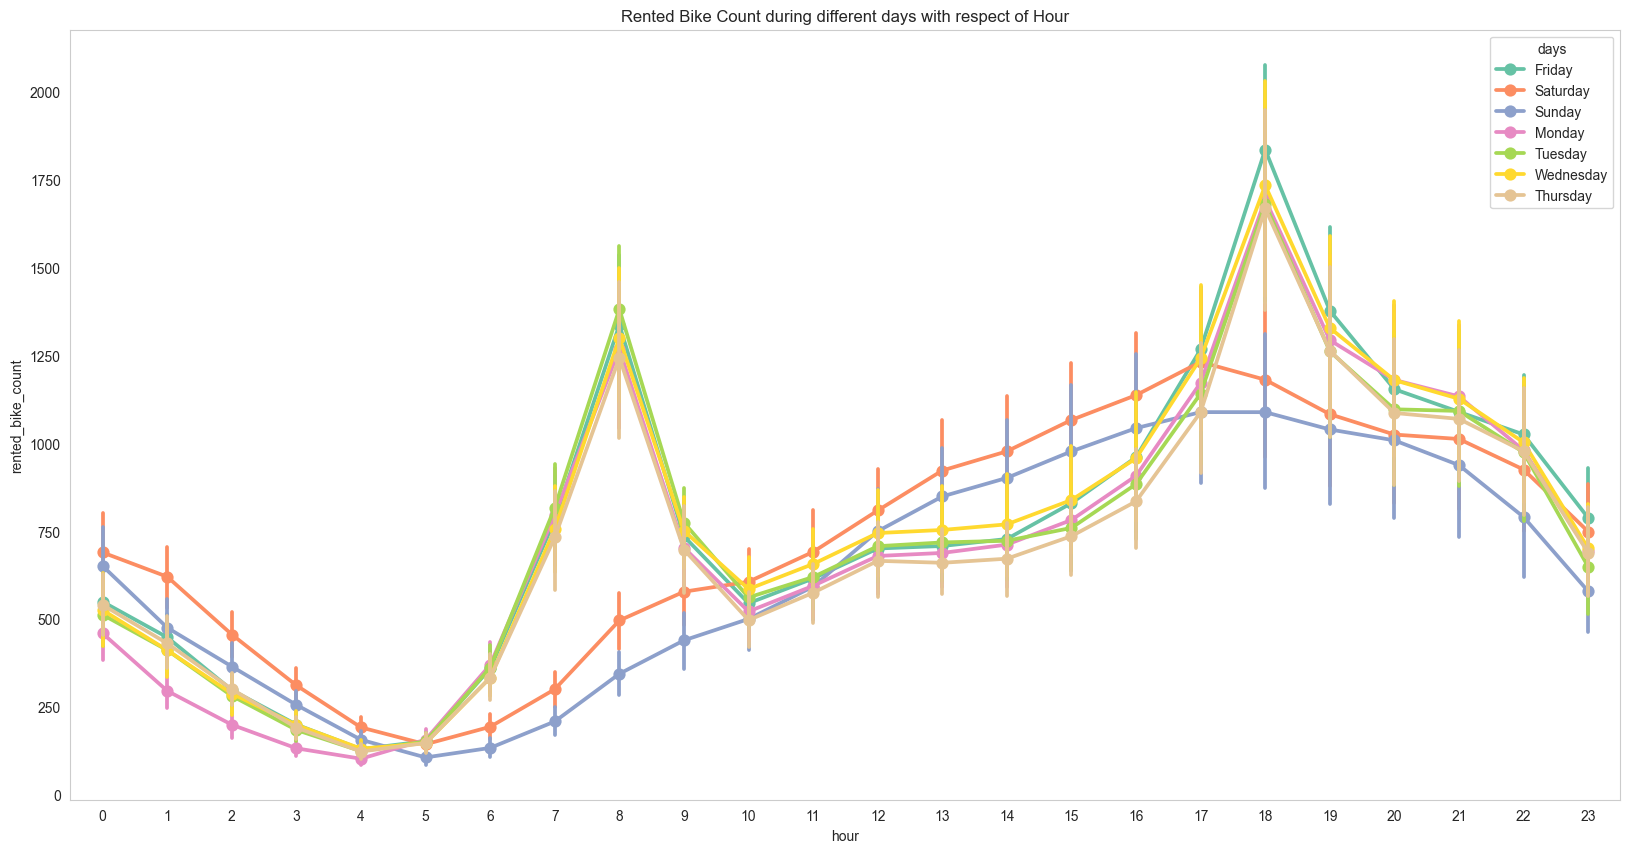

In [37]:
for i in categorical_features:
    plt.figure(figsize=(20,10))
    sns.pointplot(data=seoul_bike_sharing_df, x='hour',y='rented_bike_count',hue=i, palette='Set2')
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
plt.show()

From these point plots we have a lot of information, let's analyze them one by one: 

- `seasons`: We notice that the number of bikes rented is higher during the **Summer** and **Autumn** seasons. This is probably because the weather is warmer during these seasons. This confirms the high correlation between the number of rented bikes and the temperature, the temperature being warmer in summer. The season with the least number of rented bikes is **Winter** probably because the weather is colder. This confirms what we said earlier when we were looking at the months.
- `holiday`: We notice that the number of bikes rented is higher during **non holidays**. This is probably because people use the bikes to go to work and don't use the bikes during the holidays. With the help of the `days` column we can confirm that the days with the least number of rented bikes are **Saturday** and **Sunday** and that therefore people use the bikes to go to work.

A noticeable trend emerges from these visualizations regarding the timing of bike rentals. The number of bikes rented is higher during **peak hours**, meaning when people are commuting to work and back home.

<h3 id="4c">Scatter Plot</h3>

We will use the scatter plot to visualize the relationship between the `Rented Bike Count` column and the other numerical columns.

```python

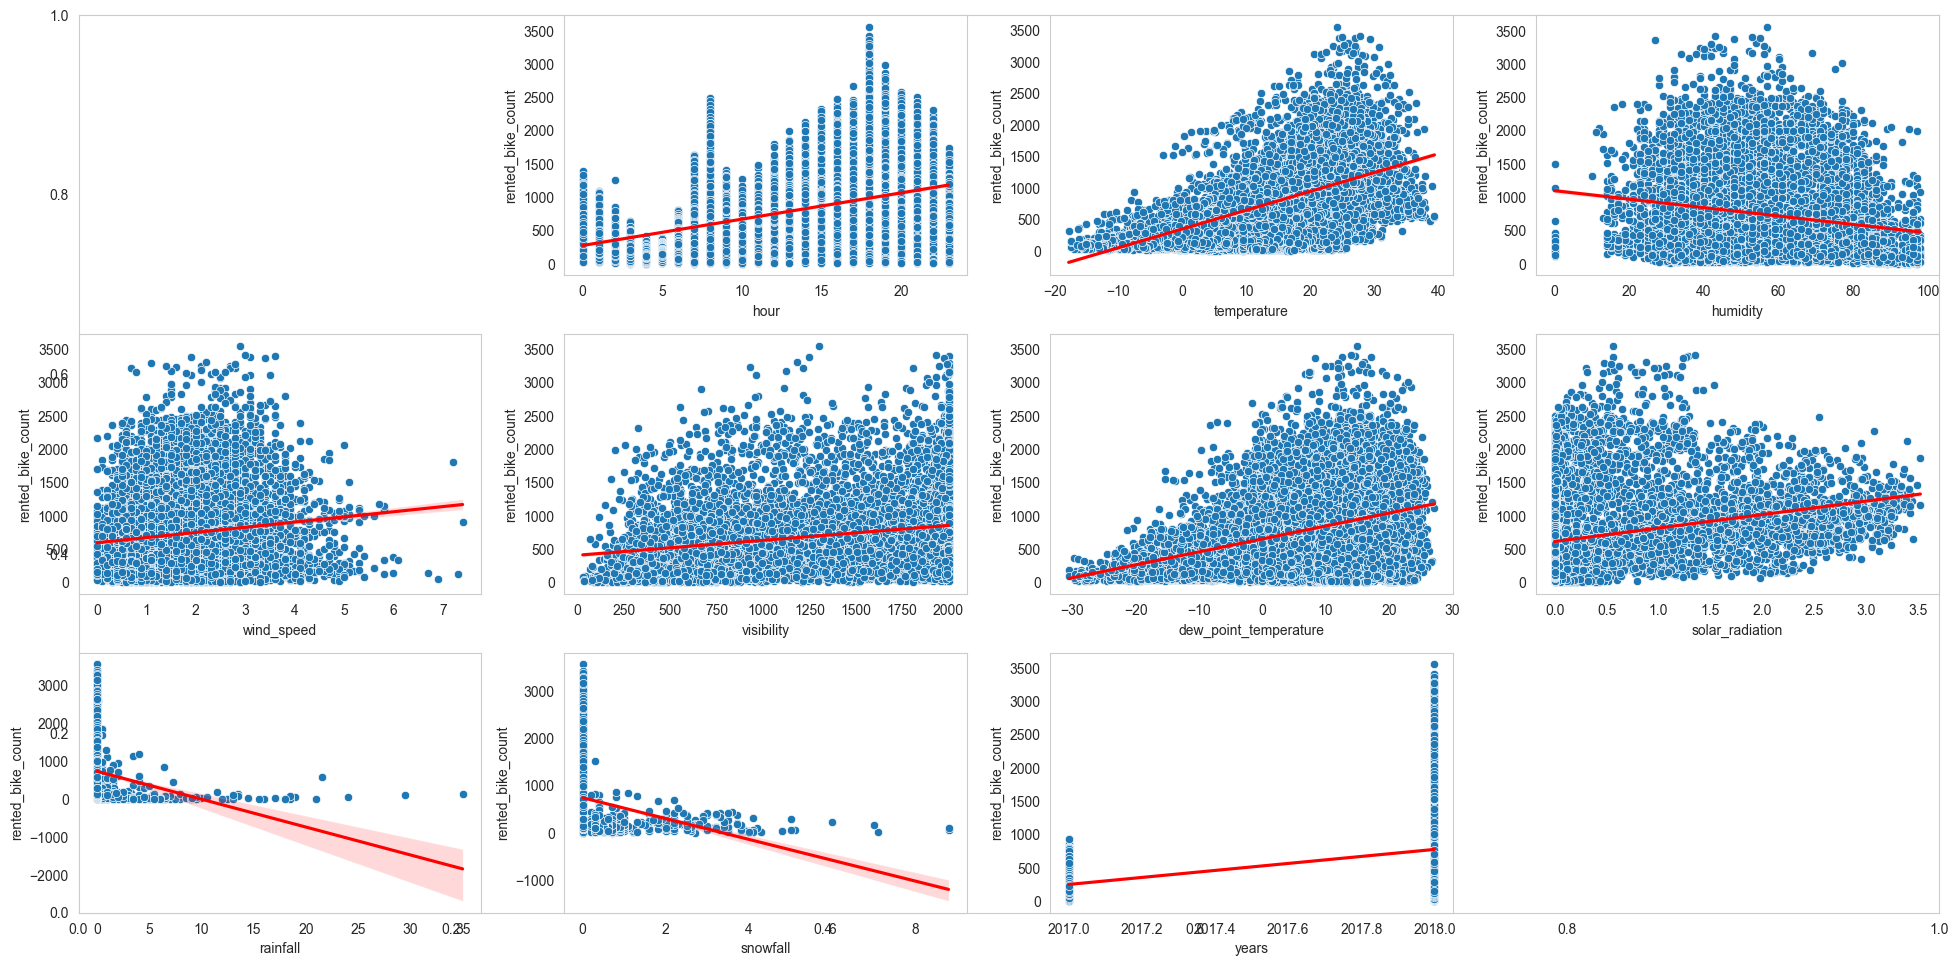

In [38]:
# Look at the relationship between the numerical features and the target variable
figure, ax = plt.subplots(figsize=(20,10))
for i, feature in enumerate(numerical_features):
    if feature == 'rented_bike_count':
        pass
    else:
        plt.subplot(3, 4, i+1)
        sns.scatterplot(data=seoul_bike_sharing_df, x=feature, y='rented_bike_count')
        sns.regplot(data=seoul_bike_sharing_df, x=feature, y='rented_bike_count', scatter=False, color='red')
        plt.xlabel(feature)

plt.tight_layout()

From these plots we notice that some of the features have a positive linear relationship with the target `rented_bike_count` column and others have a negative linear relationship. 

<h3 id="4d">Correlation Plot</h3>

The correlation matrix will help us understand the relationship between the numerical columns. It will also help us understand which features are more correlated with the target variable. Let us see the correlation of all the numerical features with the heat map, so that we will also get to know the multilinearity.

```python

<Axes: >

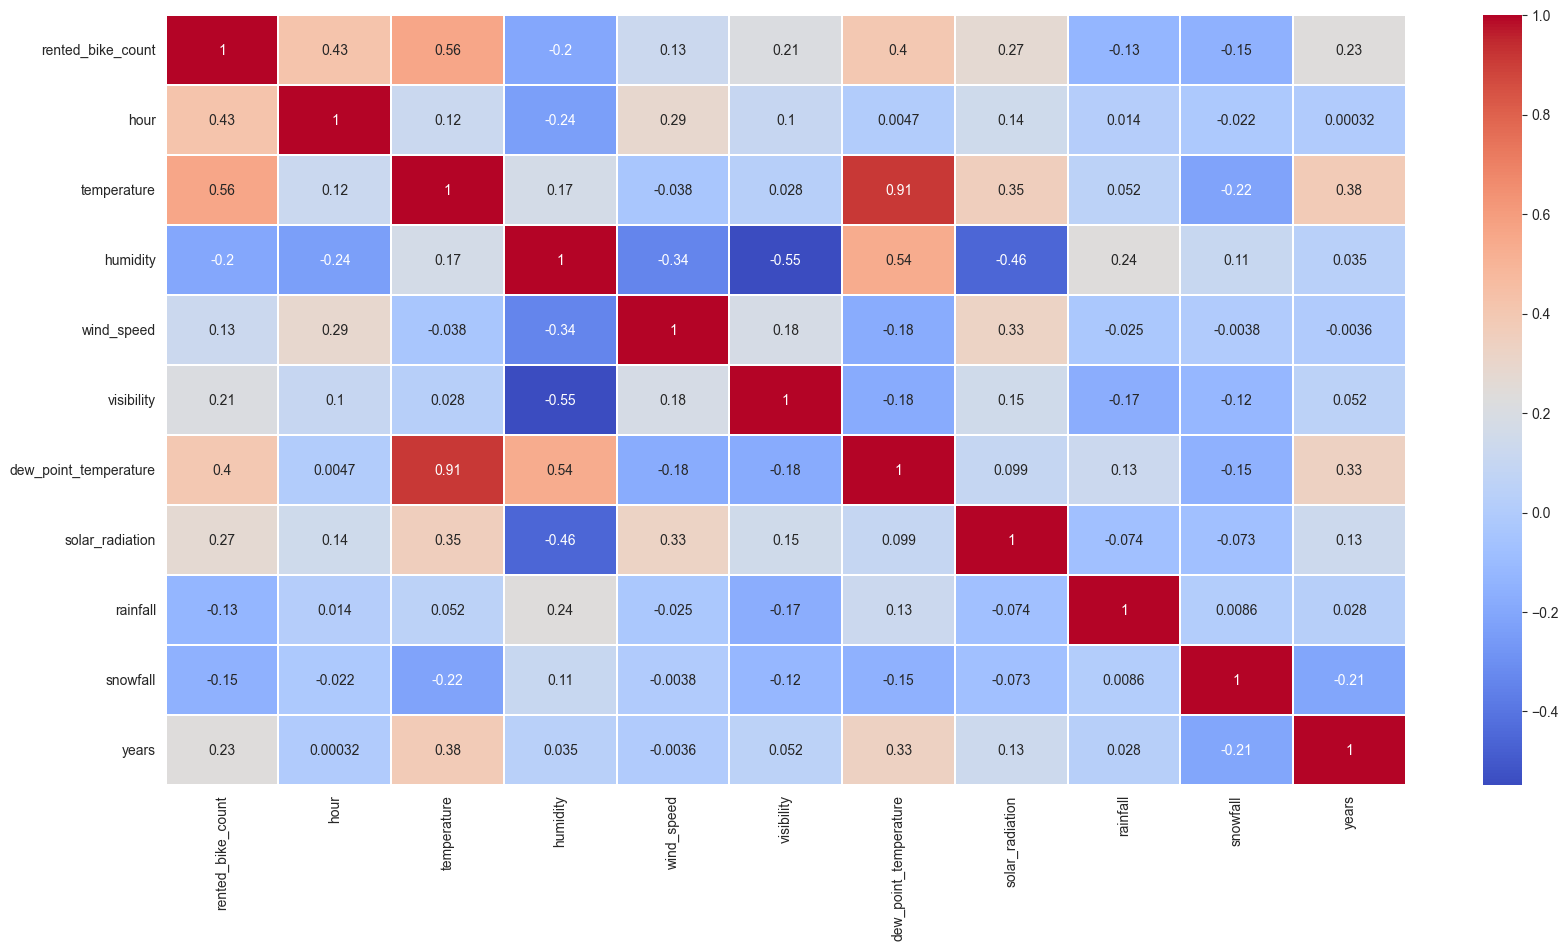

In [39]:
plt.figure(figsize=(20,10))
sns.heatmap(seoul_bike_sharing_df[numerical_features].corr(), cmap='coolwarm', annot=True, linewidths=0.1, linecolor='white')

We know correlation helps us express the strength of the relationship between two variables. As we observed from the previous plot, the target variable has positive and negative correlations with the other variables. But we can also use it to see multicollinearity between features. Indeed there is a strong positive correlation between the `temperature` and `dew_point_temperature` columns. This means that these two features are highly correlated and that we can drop one of them without losing much information. We will drop the `dew_point_temperature` column since it is less correlated (**0.4** compared to **0.56** for the `temperature` column) with the target variable.

Before deleting the `dew_point_temperature` we can see that with our target variable (Rented Bike Count), the most correlated variables are `hour`, and `temperature`. 

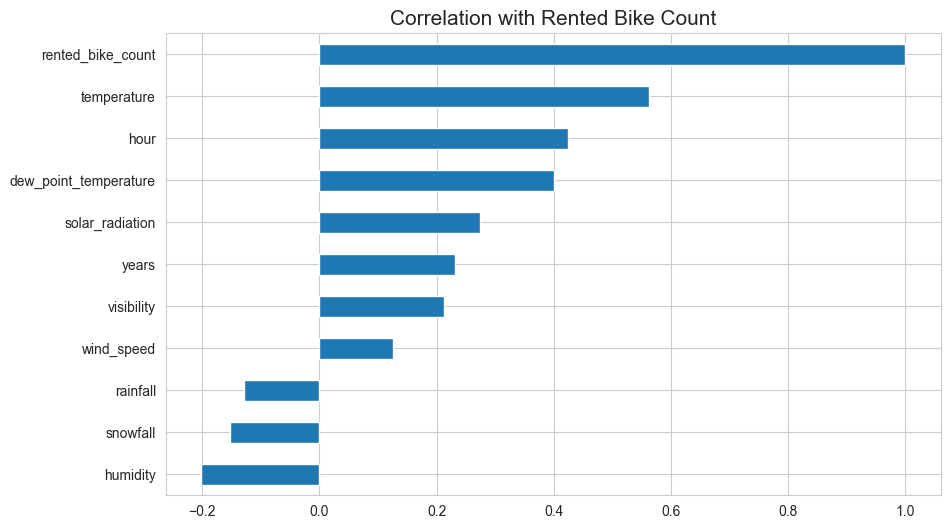

In [40]:
plt.figure(figsize=(10,6))
target_variable = round(seoul_bike_sharing_df[numerical_features].corr().iloc[0].sort_values(), 3)
target_variable.plot(x = target_variable.index, y = target_variable.values, kind = "barh", figsize = (10,6),grid=True);
plt.title("Correlation with Rented Bike Count",fontsize=15,fontweight="medium")
plt.show()

In [41]:
# Drop the dew_point_temperature column as it is highly correlated with the temperature column
seoul_bike_sharing_df.drop('dew_point_temperature', axis=1, inplace=True)

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="5">Feature Engineering</h2>

After getting a bit more understanding of the data, we can now start to engineer some features. Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning.

```python

<h3 id="5a">Feature Encoding</h3>

We will start by encoding the categorical features. Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns. For example when we have a categorical feature with two categories such as `Holiday` and `No holiday` we can encode them as `0`(to represent `Holiday`) and `1`(to represent `No Holiday`) respectively. We will also add the `hour` column to the list  since it is a cyclical feature but we can do that later. We will use the `pandas.get_dummies()` method to encode the categorical columns. We will also change the `hour` column to a categorical column since it is a cyclical feature.

There is way more columns than we had before. This is because we have encoded the categorical columns using one-hot encoding.

In [42]:
# Define the columns to be one hot encoded
columns_to_encode = ['holiday', 'seasons', 'hour', 'days', 'months']

# dummy encode the categorical features
new_seoul_bike_sharing_df = pd.get_dummies(data=seoul_bike_sharing_df, columns=columns_to_encode, dtype='int64')

In [43]:
new_seoul_bike_sharing_df.head()

rented_bike_count  temperature  humidity  wind_speed  visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   solar_radiation  rainfall  snowfall  years  holiday_Holiday  \
0              0.0       0.0       0.0   2017                0   
1              0.0       0.0       0.0   2017                0   
2              0.0       0.0       0.0   2017                0   
3              0.0       0.0       0.0   2017                0   
4              0.0       0.0       0.0   2017                0   

   holiday_No Holiday  seasons_Autumn  seasons_Spring  seasons_Summer  \
0                   1               0               0               0   
1                   1               0               0               0   
2                   1               0               0               0   
3                   1               0               0               0   
4                   1               0               0               0   

   seasons_Winter  hour_0  hour_1  hour_2  hour_3  hour_4  hour_5  hour_6  \
0               1       1       0       0       0       0       0       0   
1               1       0       1       0       0       0       0       0   
2               1       0       0       1       0       0       0       0   
3               1       0       0       0       1       0       0       0   
4               1       0       0       0       0       1       0       0   

   hour_7  hour_8  hour_9  hour_10  hour_11  hour_12  hour_13  hour_14  \
0       0       0       0        0        0        0        0        0   
1       0       0       0        0        0        0        0        0   
2       0       0       0        0        0        0        0        0   
3       0       0       0        0        0        0        0        0   
4       0       0       0        0        0        0        0        0   

   hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  hour_22  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   hour_23  days_Friday  days_Monday  days_Saturday  days_Sunday  \
0        0            1            0              0            0   
1        0            1            0              0            0   
2        0            1            0              0            0   
3        0            1            0              0            0   
4        0            1            0              0            0   

   days_Thursday  days_Tuesday  days_Wednesday  months_April  months_August  \
0              0             0               0             0              0   
1              0             0               0             0              0   
2              0             0               0             0              0   
3              0             0               0             0              0   
4              0             0               0             0              0   

   months_December  months_February  months_January  months_July  months_June  \
0                1                0               0            0            0   
1                1                0               0            0            0   
2                1                0               0            0            0   
3                1                0               0            0            0   
4                1                0               0            0            0   

<h3 id="5b">Transformation of the target variable</h3>

Before moving on, we had seen previously that our target variable `Rented Bike Count` was skewed to the right. We have to apply a method to reduce the skewness of the target variable. There are different methods that we can refer to such as the logarithmic transformation or the square root transformation. Let us compare the different transformations and see which one is the best.

- <u>The square root transformation</u> is typically used when the data is moderately skewed to the rigth. It transforms values from **y** to **sqrt(y)**.
- <u>The log  transformation</u> has major effects on the distribution shape and is also often used to reduce right skewness. It transforms values from **y** to **log(y)**.

Text(0.5, 1.0, 'Square root')

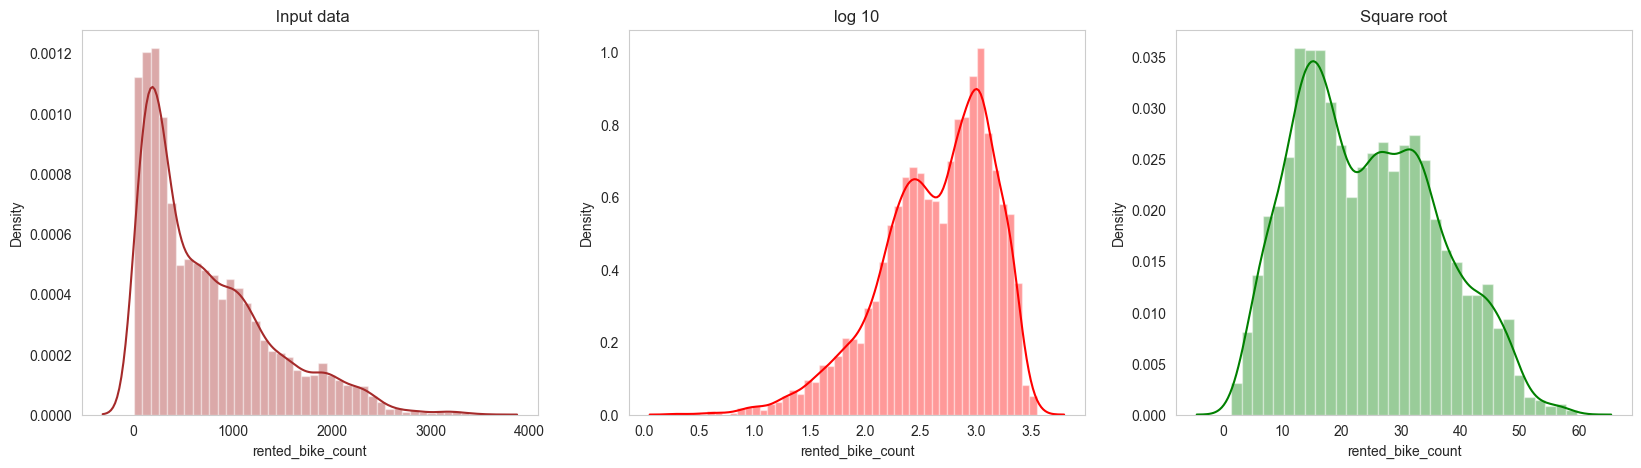

In [44]:
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot((seoul_bike_sharing_df['rented_bike_count']),ax=axes[0],color='brown').set_title(" Input data")
sns.distplot(np.log10(seoul_bike_sharing_df['rented_bike_count']+0.0000001),ax=axes[1],color='red').set_title("log 10") #transformation is only posible in positive value and >0 value so add 0.0000001 in data
sns.distplot(np.sqrt(seoul_bike_sharing_df['rented_bike_count']),ax=axes[2], color='green').set_title("Square root") #main advantage as it can be applied to zero values

By looking at the different plots we can see that the **square root transformation** is the best one to use since it reduces the skewness of the target variable the most and the data is normalized to some point. Thus, we will use the square root transformation to normalize the target variable. Plus we do not end up with any missing values because there are no negative values in the `rented_bike_count` column.

In [45]:
new_seoul_bike_sharing_df['rented_bike_count'] = np.sqrt(new_seoul_bike_sharing_df['rented_bike_count'])

<h3 id="5c">Feature Selection</h3>

Feature selection methods are here to help us reduce the number of input variables to collect the ones that are going to be the most beneficial for our model. By reading [this article](https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/) from Machine Learining Mastery, we found a framework that will help us choose the most adapted method for our problem.

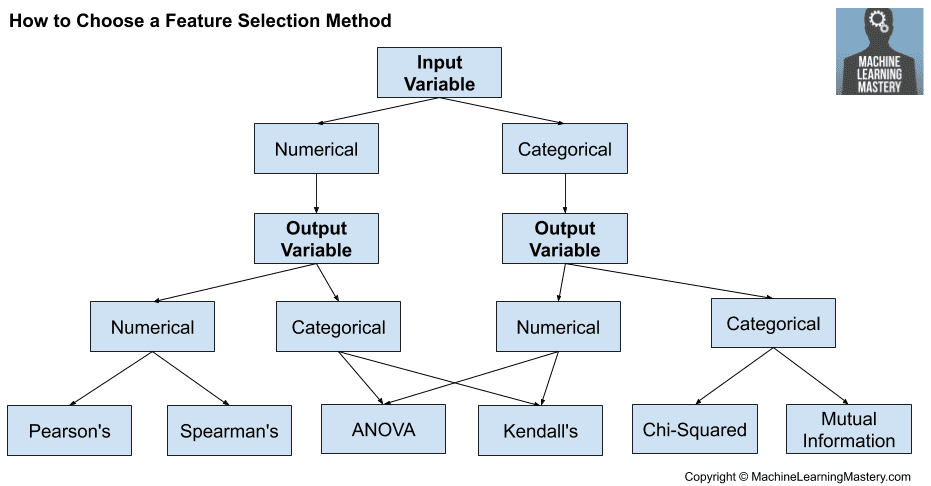

For our data, our input variables are mostly numerical variables and our output variable is also numerical. Therefore we can either use Pearson's or Spearman's for the feature selection. In our case we will use **Pearson's** because it is more adapted for linear relationships while Spearman's is more adapted for monotonic relationships. We will declare x and y as follows:

The column `rented_bike_count` is now normalized. As we said before it is the target variable and therfore the value we want to predict. The data from the other columns, the features, can be used as inputs for the model that we will create in a later section. We create a list **x** of the data that can be used as input for the training and a list **y** for the target variable. 

In [46]:
x = new_seoul_bike_sharing_df.drop('rented_bike_count', axis=1)
y = new_seoul_bike_sharing_df['rented_bike_count']

In [47]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(x, y)

SelectKBest(k='all', score_func=<function f_regression at 0x000001DCFFC3FEC0>)

In [48]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100
print(feature_contribution)

[2.61156162e+01 2.81639296e+00 6.89926689e-01 2.65928120e+00
 5.84615208e+00 1.55606282e+00 1.53621568e+00 2.99173357e+00
 3.35112432e-01 3.35112432e-01 1.77182978e+00 1.72536522e-02
 4.44477491e+00 1.55673943e+01 5.97136196e-02 2.91429070e-01
 8.62607590e-01 1.70321514e+00 2.67943936e+00 2.57656888e+00
 1.03423913e+00 2.84767841e-02 4.51959734e-01 8.59905663e-05
 7.22388221e-02 6.40708580e-03 1.92331043e-02 4.73127969e-02
 7.21013707e-02 1.60883580e-01 3.39485946e-01 8.98971687e-01
 2.32829900e+00 9.82859268e-01 5.59322496e-01 4.82540412e-01
 2.61262663e-01 2.45800027e-04 6.03787613e-02 2.10671075e-03
 1.91661089e-03 2.12111306e-01 2.34539686e-03 9.33330468e-03
 2.95385403e-02 7.95708700e-03 4.19099944e-01 2.99173359e+00
 3.20321689e+00 4.07023865e+00 8.44993659e-01 2.68273679e+00
 3.79504704e-01 5.54274458e-01 2.44548970e-02 7.24219684e-01
 1.17808092e+00]


temperature : 26.12%
humidity : 2.82%
wind_speed : 0.69%
visibility : 2.66%
solar_radiation : 5.85%
rainfall : 1.56%
snowfall : 1.54%
years : 2.99%
holiday_Holiday : 0.34%
holiday_No Holiday : 0.34%
seasons_Autumn : 1.77%
seasons_Spring : 0.02%
seasons_Summer : 4.44%
seasons_Winter : 15.57%
hour_0 : 0.06%
hour_1 : 0.29%
hour_2 : 0.86%
hour_3 : 1.70%
hour_4 : 2.68%
hour_5 : 2.58%
hour_6 : 1.03%
hour_7 : 0.03%
hour_8 : 0.45%
hour_9 : 0.00%
hour_10 : 0.07%
hour_11 : 0.01%
hour_12 : 0.02%
hour_13 : 0.05%
hour_14 : 0.07%
hour_15 : 0.16%
hour_16 : 0.34%
hour_17 : 0.90%
hour_18 : 2.33%
hour_19 : 0.98%
hour_20 : 0.56%
hour_21 : 0.48%
hour_22 : 0.26%
hour_23 : 0.00%
days_Friday : 0.06%
days_Monday : 0.00%
days_Saturday : 0.00%
days_Sunday : 0.21%
days_Thursday : 0.00%
days_Tuesday : 0.01%
days_Wednesday : 0.03%
months_April : 0.01%
months_August : 0.42%
months_December : 2.99%
months_February : 3.20%
months_January : 4.07%
months_July : 0.84%
months_June : 2.68%
months_March : 0.38%
months_May 

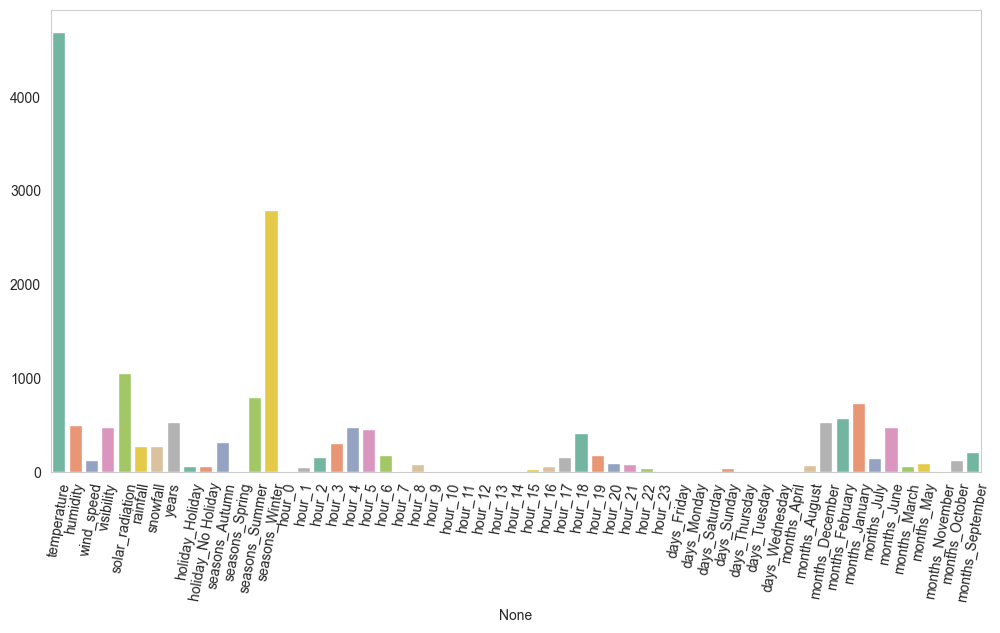

In [49]:
for i,j in enumerate(x.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=x.columns,y=fs.scores_, palette='Set2')
plt.xticks(rotation=80)
plt.show()

<h3 id="5d">Splitting data into Train & Test sets</h3>

Before proceding to the feature scaling and modeling let's split our data set into a training set and a test set. We will use the `train_test_split()` method from the `sklearn.model_selection` module. The distribution of our data will be the following: **70% of the data for training and 20% for testing**.

```python

In [65]:
# Method to split the data into train and test set
def split(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

In [66]:
x_train, x_test, y_train, y_test = split(x, y)

Let's take a look at the data that we have for training and testing.

In [67]:
print(f'The shape of the train and test set for the features: x_train = {x_train.shape}, x_test = {x_test.shape}')
print(f'The shape of the train and test set for the target: y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the features: x_train = (5925, 57), x_test = (2540, 57)
The shape of the train and test set for the target: y_train = (5925,), y_test = (2540,)


<h3 id="5e">Feature Scaling</h3>

In the last step of this feature engineering section we will scale the data. Scaling the data is important because it will help us avoid the problem of having features with different scales. We can either choose the **Standardization** or the **Normalization** method. For our dataset, since we have a lot of features with outliers and normalization does not respond well to such cases, we will use the **Standardization** method. 

In [68]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="6">Model Building</h2>

The type of problem that we have requires the use of a supervised machine learning technique as we have a set of input variables and based on those we want to predict an output variable. There are different types of supervised learning techniques but in our case we shall use the a regression model because we want to understand the relationship between dependable and independent variables. Moreover, it is a type of supervised learning that learns from labelled data sets to predict continuous output for different data in an algorithm. 

There are different types of regression models: <br>

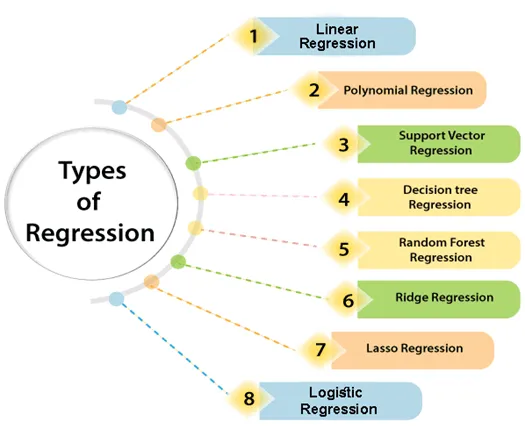

We will not go through all of them but use at least 3.

<h3 id="6a">Function to train model</h3>

This is a function that will help us train our model. It will take as input the model that we want to train and the training data and return the y_pred variable which is the prediction of the model on the test data. 

In [69]:
#store the models score
training_score=[]
model_list = []

def train_model(model, x_train, y_train, x_test):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = model.score(x_train, y_train)
    print("Training Score: {}".format(score))
    training_score.append(score)
    return y_pred

# Finding the best parameters for the model
def best_params(model):
    print(f"The best parameters found out to be :{model.best_params_} \nwhere model best score is:  {model.best_score_} \n")

<h3 id="6b">Function to evaluate performance</h3>

Now that we have created our models let us define a function that will help us evaluate the performance of our models. We will use the $R^2$ is a statistical measure that measures the proportion of the variance in the dependent variable that is predictable from the independent variables. Another metric that will evaluate the performance of our model is the $MSE$ (Mean Squared Error) is a risk function that allows us to calculate the average squared difference between a feature’s or variable’s predicted and actual value. It is used to check how close estimates or forecasts are to actual values.

In [70]:
#store the results of different models in lists
mean_squared_error_list = []
r2_score_list = []

def evaluate_performance(y_test, y_pred):
    #finding the R2 score
    r2 = r2_score(y_test, y_pred)
    print("R2 Score: {}".format(r2))
    #finding the (MSE) Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print("Mean Squared Error: {}".format(mse))

    #append the results in the lists
    mean_squared_error_list.append(mse)
    r2_score_list.append(r2)

    return r2, mse

<h3 id="6c">Function to plot</h3>

This function will plot the graph of actual values and predicted values. 

In [71]:
def plot(y_test, y_pred):
    figure,ax = plt.subplots(nrows =1, ncols=2, figsize=(20,10))

    sns.regplot(x=y_pred, y=y_test, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"},ax=ax[0])
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    ax[0].set(title="Scatter plot - Actual vs predicted values")

    # For better visualization we can observe the first 100 values
    ax[1].plot(y_test.values[:100], color='blue', label='Actual')
    ax[1].plot(y_pred[:100], color='red', label='Predicted')

    ax[1].set(title='Prediction')
    ax[1].set_xlabel('Hours')
    ax[1].set_ylabel('Rented Bike Count')
    ax[1].legend()

<h3 id="6d">Linear Regression</h3>

Training Score: 0.7650615162981901
R2 Score: 0.7534976805080017
Mean Squared Error: 33.988288523364346


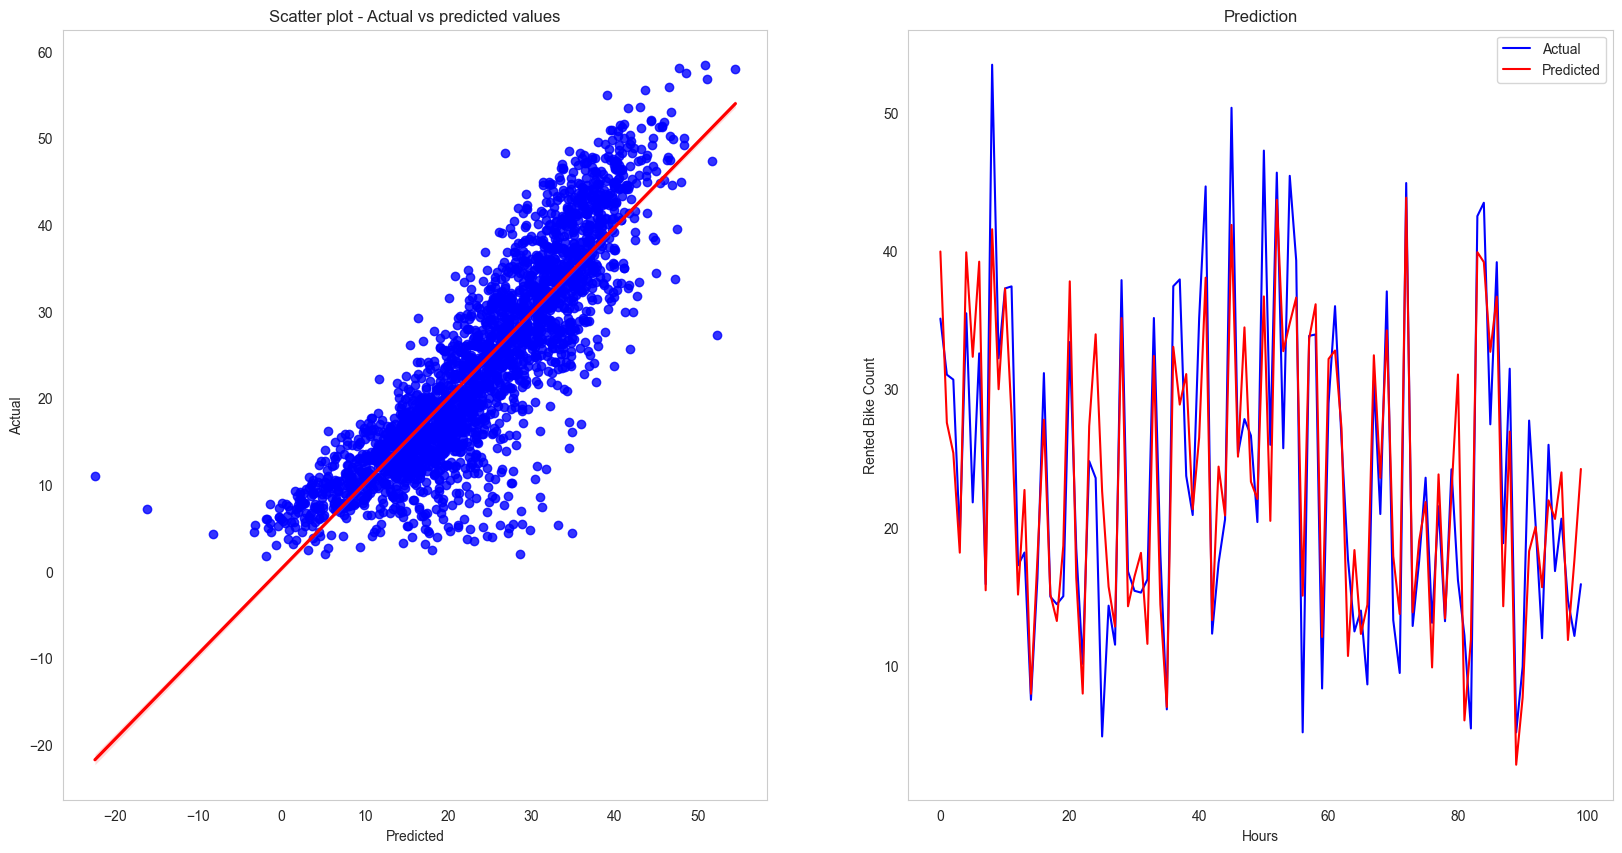

In [72]:
linear_regression = LinearRegression()
model_list.append('Linear Regression')
linear_regression_y_pred = train_model(linear_regression, x_train, y_train, x_test)
r2, mse = evaluate_performance(y_test, linear_regression_y_pred)
plot(y_test, linear_regression_y_pred)

<h3 id="6e">Polynomial Regression</h3>

Polynomial regression is a form of regression analysis where the relationship between the independent variable `x` and dependent variable `y` is modeled as an nth degree polynomial in `x`. We will use the `PolynomialFeatures()` method from the `sklearn.preprocessing` module to transform our data into a polynomial form. We will then use the `LinearRegression()` method from the `sklearn.linear_model` module to train our model.

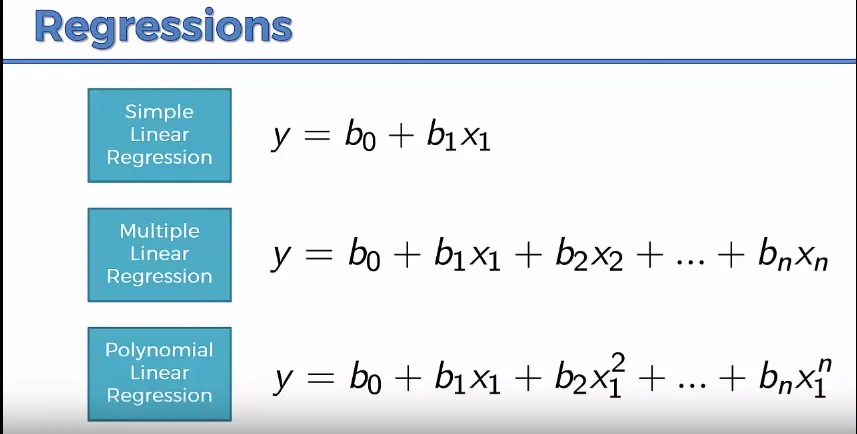

We will start with a polynomial of degree 2 and see how it performs.

Training Score: 0.933361107491099
R2 Score: 0.8817522764865664
Mean Squared Error: 16.3042593363348


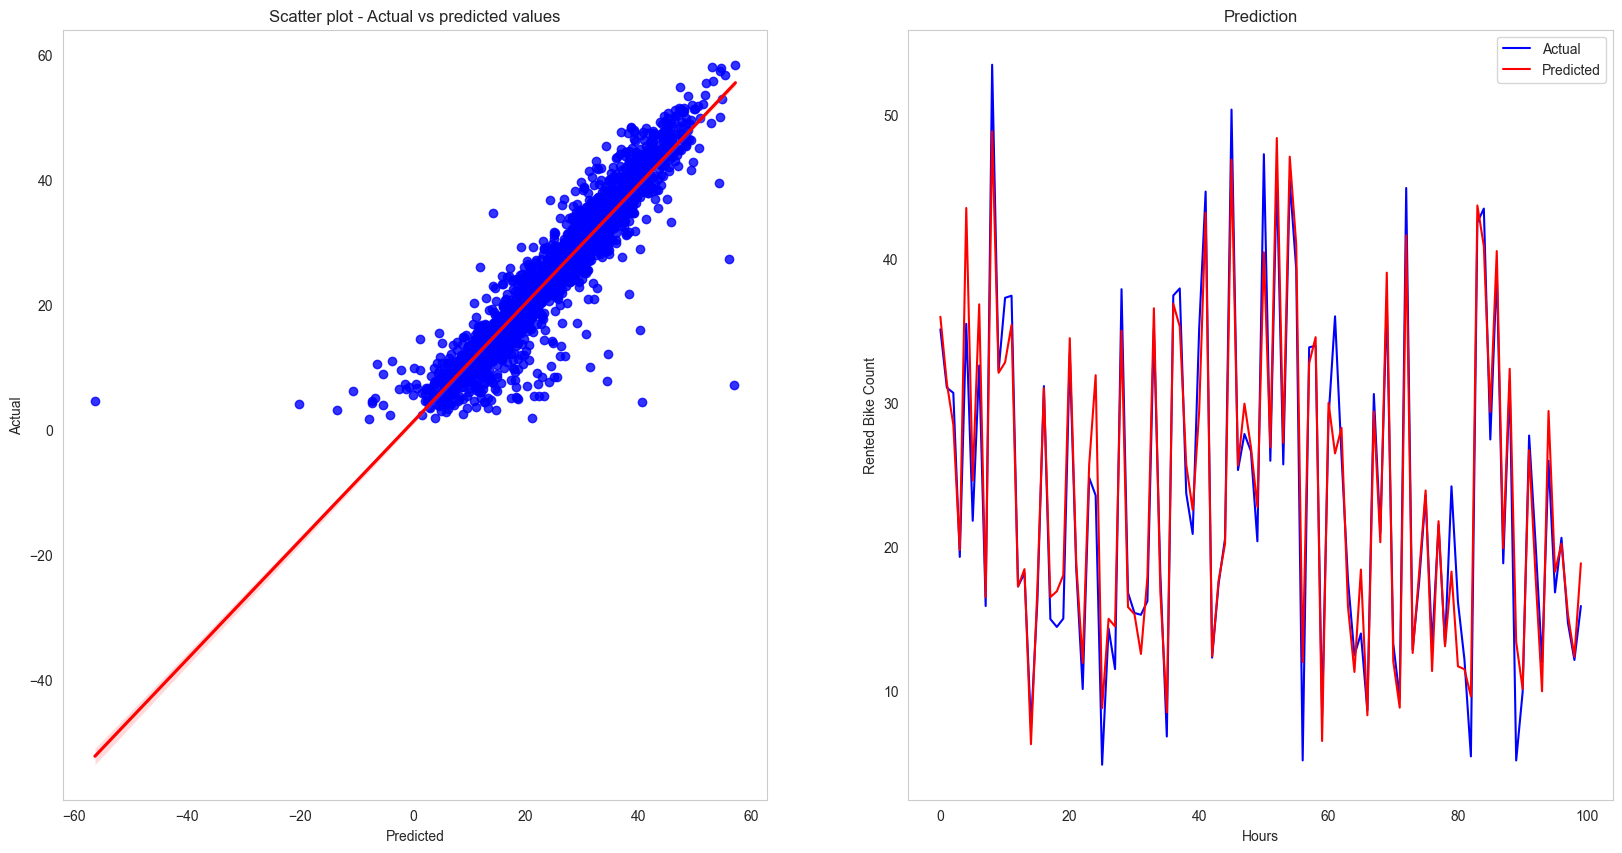

In [73]:
poly_reg = PolynomialFeatures(degree=2)
x_train_poly = poly_reg.fit_transform(x_train)
x_test_poly = poly_reg.transform(x_test)
pol_reg = LinearRegression()
model_list.append('Polynomial Regression')
pol_reg_y_pred = train_model(pol_reg, x_train_poly, y_train, x_test_poly)
evaluate_performance(y_test, pol_reg_y_pred)
plot(y_test, pol_reg_y_pred)

<h3 id="6f">Lasso Regression</h3>

Lasso regression is a regularization technique to make regression models more accurate. By shrinking the coefficients of the features, lasso regression shrinks the data values towards a center point. We will use the `Lasso()` method from the `sklearn.linear_model` module to train our model.

Training Score: 0.766272166042395
The best parameters found out to be :{'alpha': 0.001} 
where model best score is:  0.7610331720135193 

R2 Score: 0.7552694084411875
Mean Squared Error: 33.74399873208724


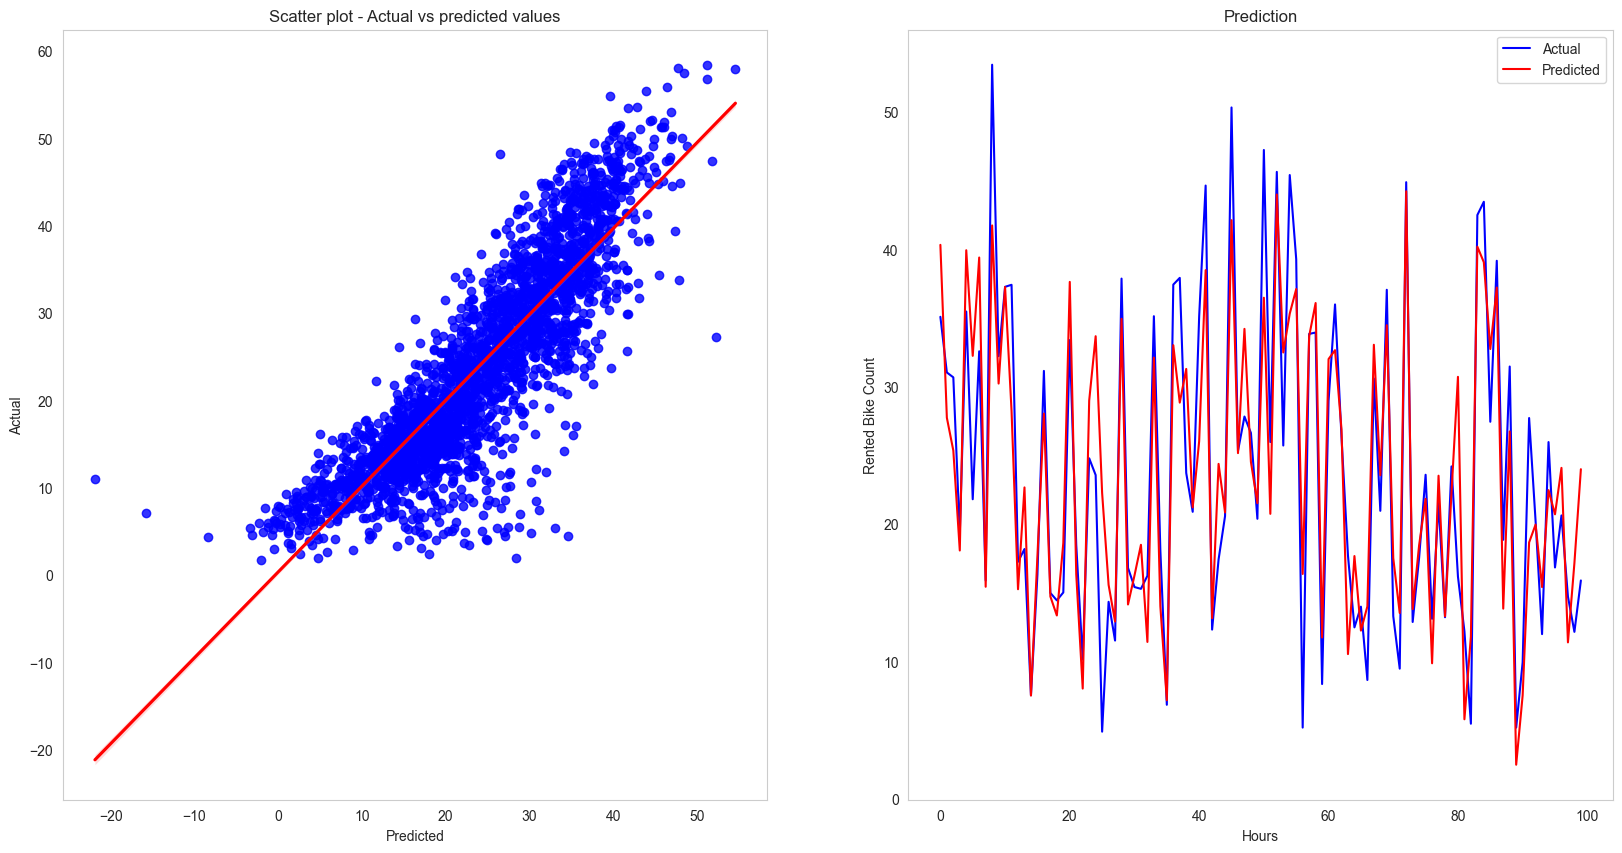

In [74]:
lasso = Lasso()
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(alpha=alpha)
lasso_grid = GridSearchCV(lasso, param_grid, cv=5)
model_list.append('Lasso Regression')
lasso_grid_y_pred = train_model(lasso_grid, x_train, y_train, x_test)
best_params(lasso_grid)
evaluate_performance(y_test, lasso_grid_y_pred)
plot(y_test, lasso_grid_y_pred)

<h3 id="6g">Ridge Regression</h3>

Ridge regression is almost identical to linear regression except it introduces a small amount of bias. The bias added is called the ridge penalty. In return, there is a significant drop in variance and can provide better long term predictions. We will use the `Ridge()` method from the `sklearn.linear_model` module to train our model.

Training Score: 0.766264820856758
The best parameters found out to be :{'alpha': 10} 
where model best score is:  0.7610414142103823 

R2 Score: 0.7553470803432668
Mean Squared Error: 33.73328915733163


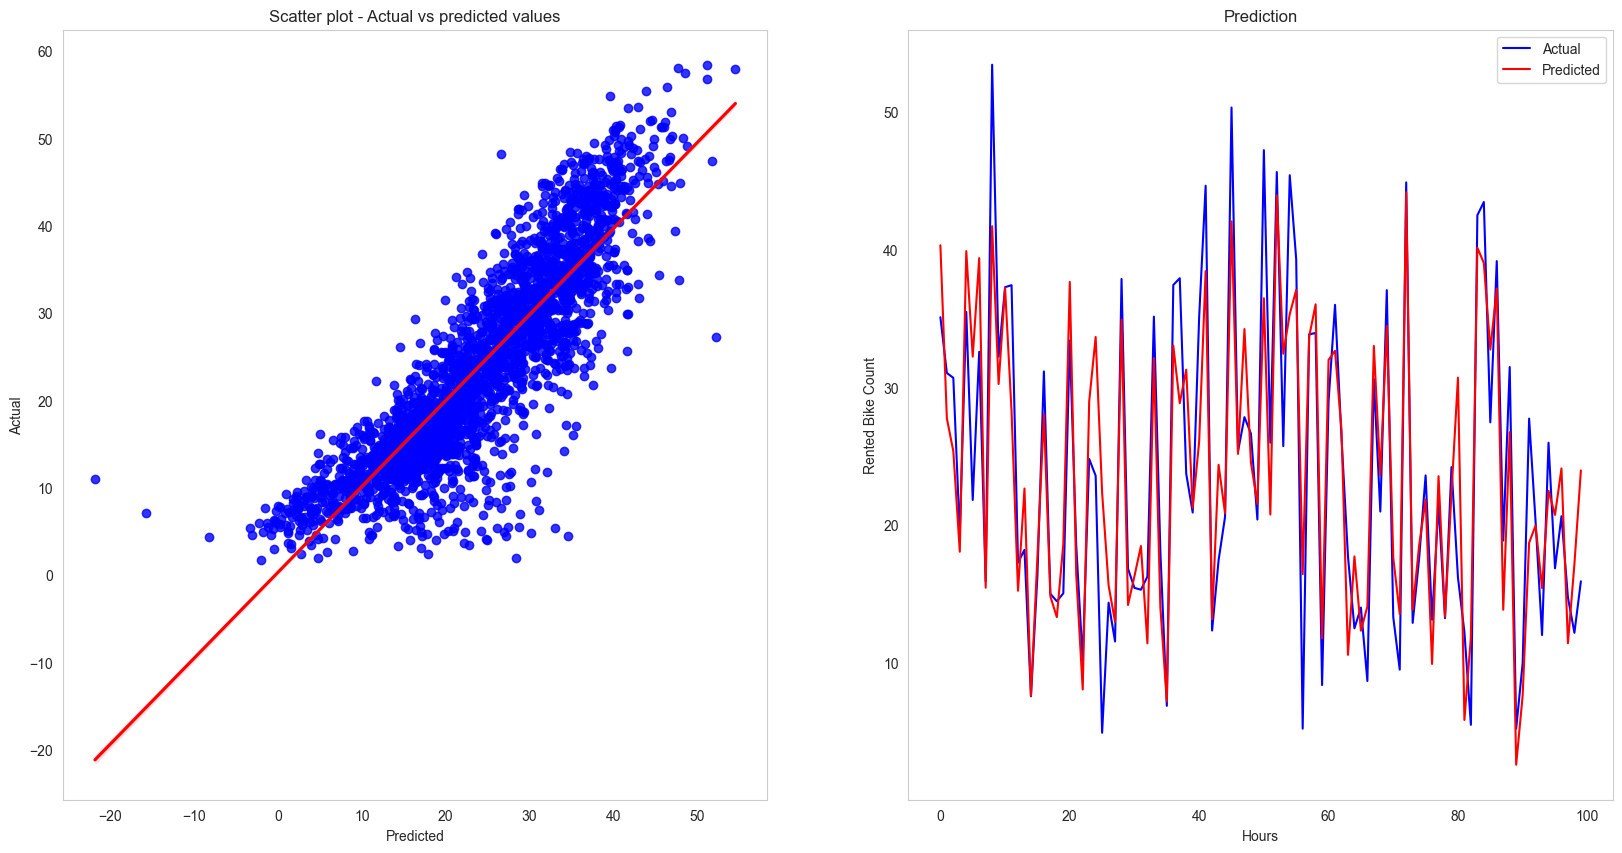

In [75]:
# Ridge Regression
ridge = Ridge()
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
param_grid = dict(alpha=alpha)
ridge_grid = GridSearchCV(ridge, param_grid, cv=5)
model_list.append('Ridge Regression')
ridge_grid_y_pred = train_model(ridge_grid, x_train, y_train, x_test)
best_params(ridge_grid)
evaluate_performance(y_test, ridge_grid_y_pred)
plot(y_test, ridge_grid_y_pred)

<h3 id="6h">Decision Tree Regression</h3>

Training Score: 0.9020423880058063
R2 Score: 0.7865031893305111
Mean Squared Error: 29.43741549696951
The best parameters found out to be :{'criterion': 'friedman_mse', 'max_depth': 25, 'max_features': 'log2', 'min_samples_split': 10, 'splitter': 'best'} 
where model best score is:  0.7218446671199046 



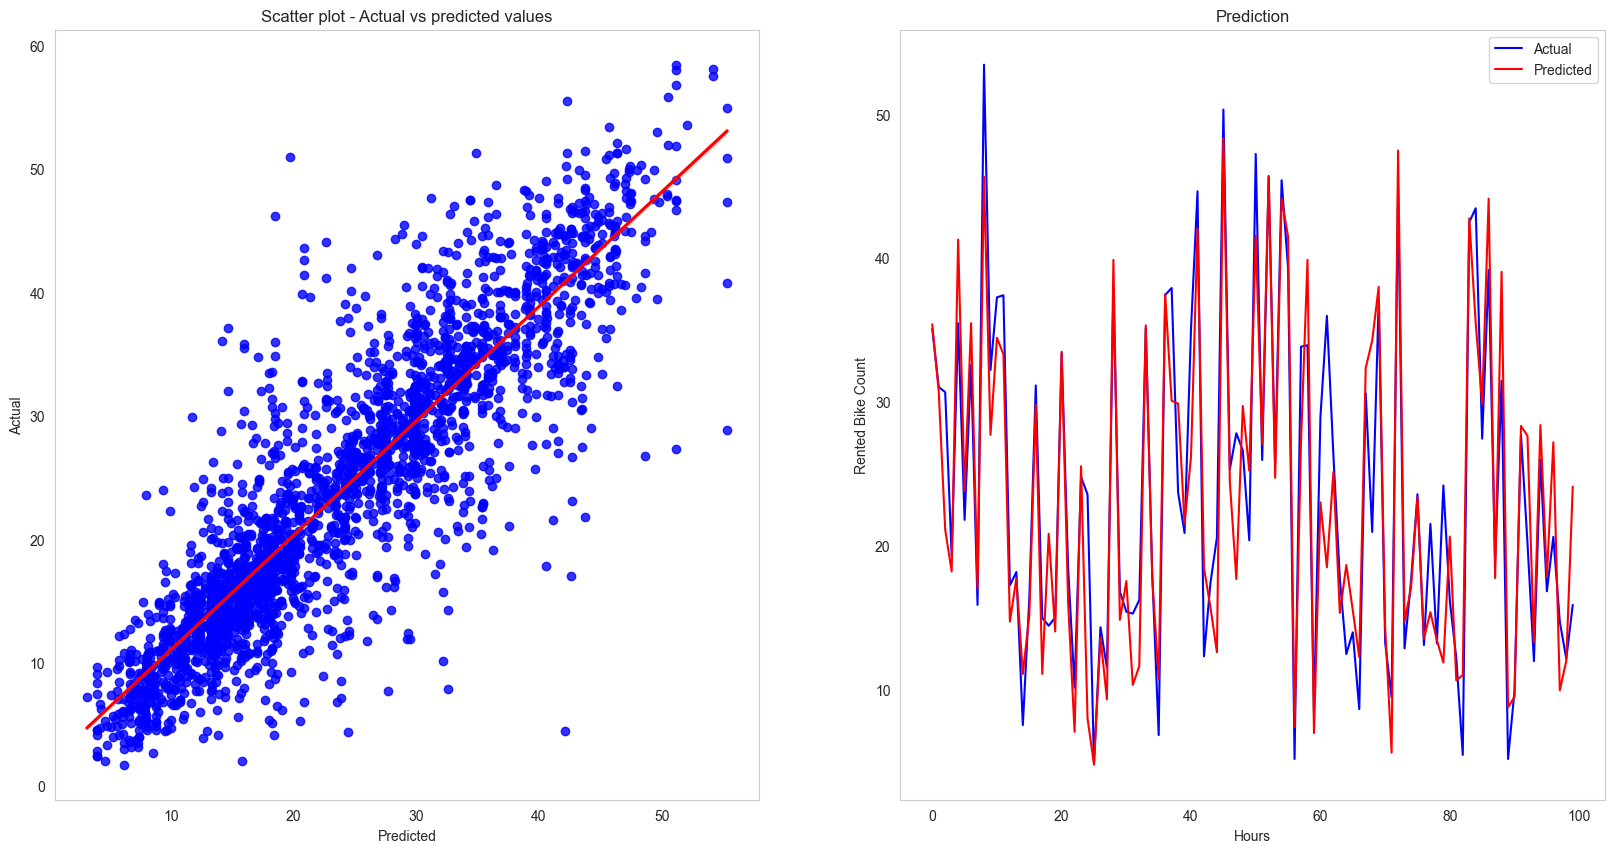

In [76]:
decision_tree = DecisionTreeRegressor()
param_grid = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
              'splitter' : ["best", "random"],
              'max_depth' : [5,10,15,20,25],
              'min_samples_split': [10,50,100],
              'max_features': ['auto', 'sqrt', 'log2']}
decision_tree_grid = GridSearchCV(decision_tree, param_grid, cv=2, n_jobs=-1)
model_list.append('Decision Tree Regressor')
decision_tree_y_pred = train_model(decision_tree_grid, x_train, y_train, x_test)
evaluate_performance(y_test, decision_tree_y_pred)
plot(y_test, decision_tree_y_pred)
best_params(decision_tree_grid)

<h3 id="6i">Random Forest Regression</h3>

Training Score: 0.9879045573587383
R2 Score: 0.9090095192043613
Mean Squared Error: 12.545970036043409


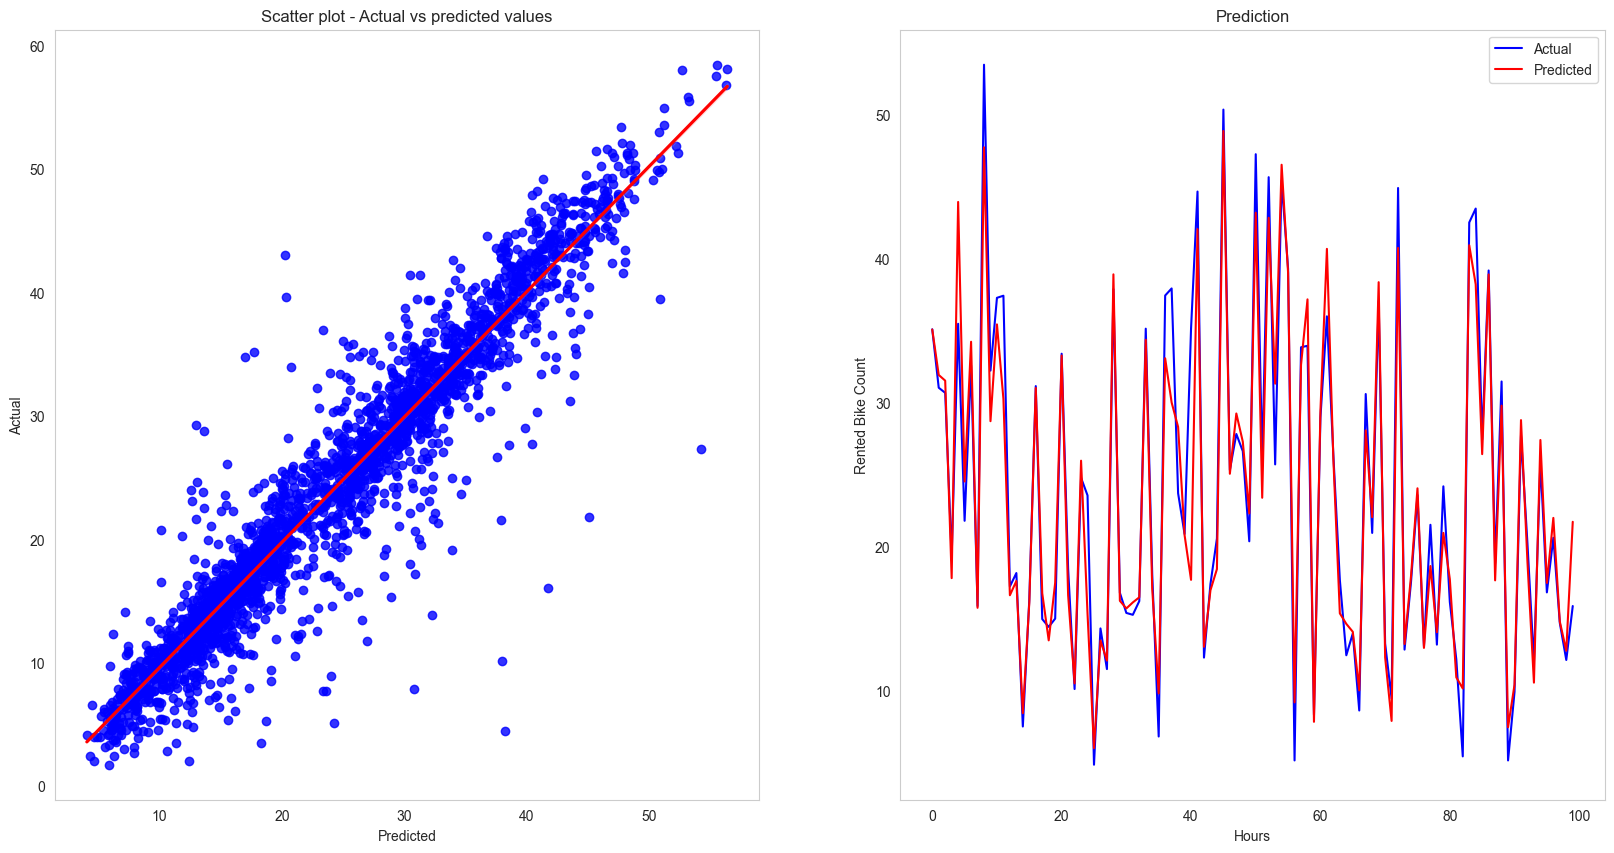

In [77]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
model_list.append('Random Forest Regressor')
y_pred_rf = train_model(rf_model, x_train, y_train, x_test)
evaluate_performance(y_test, y_pred_rf)
plot(y_test, y_pred_rf)

<h3 id="6j">Random Forest Regression with Hyperparameter Tuning</h3>

In [78]:
# With hyperparameter tuning
# rf_Model = RandomForestRegressor()
# param_grid = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [5, 10, 15, 20, 25],
#     'min_samples_split': [2, 5],
#     'max_features': ['auto', 'sqrt', 'log2']
# }
# rf_Grid = GridSearchCV(estimator=rf_Model, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
# model_list.append('Random Forest Regressor With Hyperparameter Tuning')
# y_pred_rf_cv = train_model(rf_Grid, x_train, y_train, x_test)
# evaluate_performance(y_test, y_pred_rf_cv)
# plot(y_test, y_pred_rf_cv)
# best_params(rf_Grid)

<h3 id="6k">Gradient Boosting Regressor</h3>

Training Score: 0.9759089848302296
R2 Score: 0.9190931874433929
Mean Squared Error: 11.155611413096606


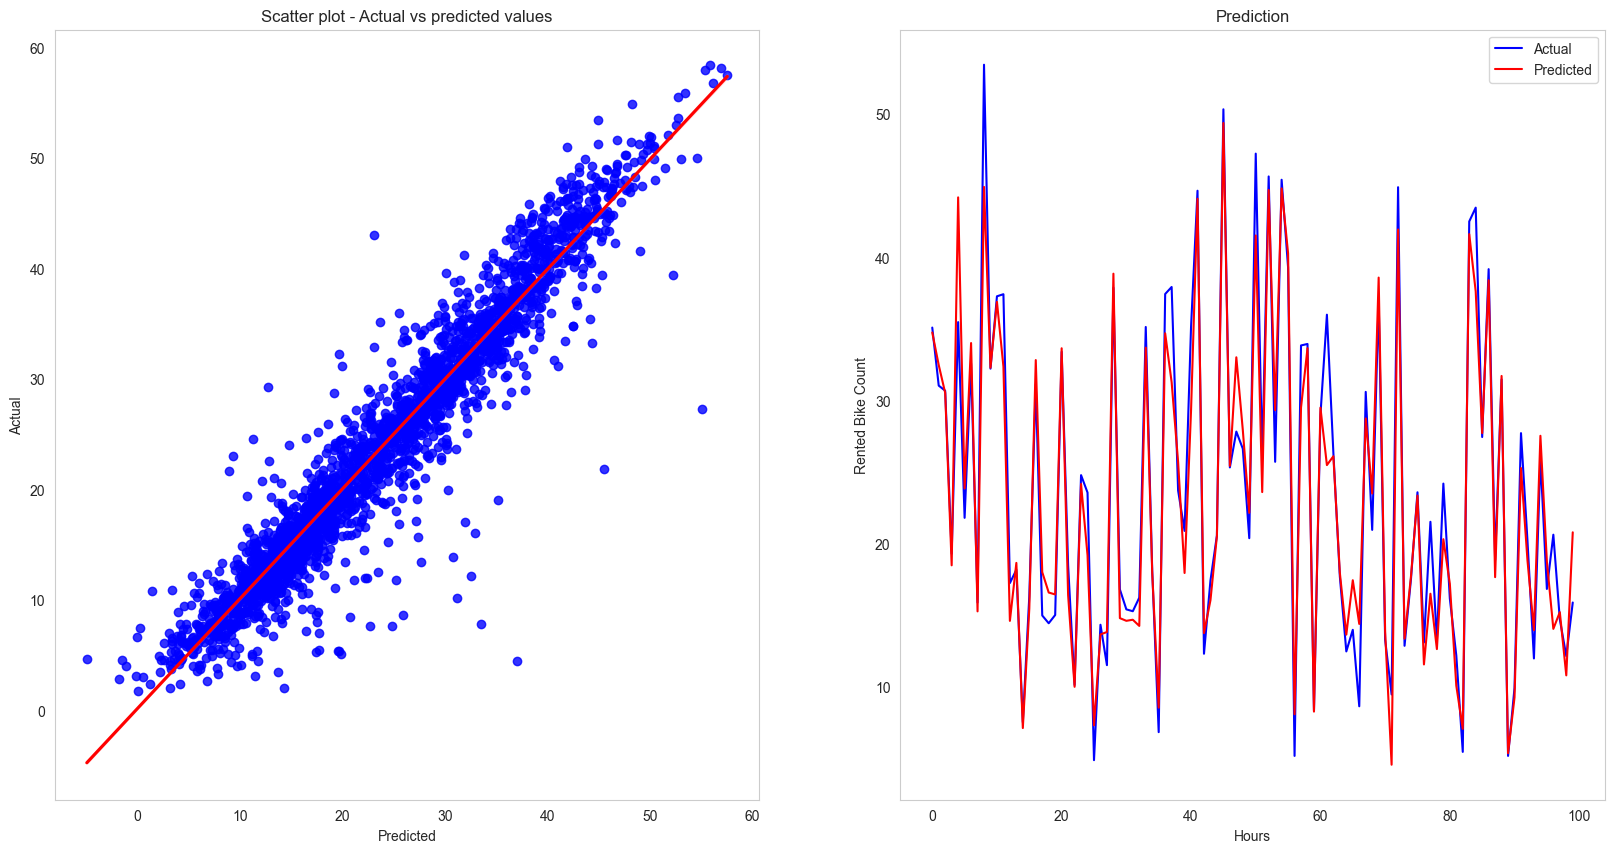

In [79]:
# Create and train the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=500, learning_rate=0.3, random_state=42)
model_list.append('Gradient Boosting Regressor')
y_pred_gradient_boosting = train_model(gb_model, x_train, y_train, x_test)
evaluate_performance(y_test, y_pred_gradient_boosting)
plot(y_test, y_pred_gradient_boosting)

<h3 id="6l">Lightgbm and xgboost</h3>

Training Score: 0.9759089848302296
R2 Score: 0.9190931874433929
Mean Squared Error: 11.155611413096606


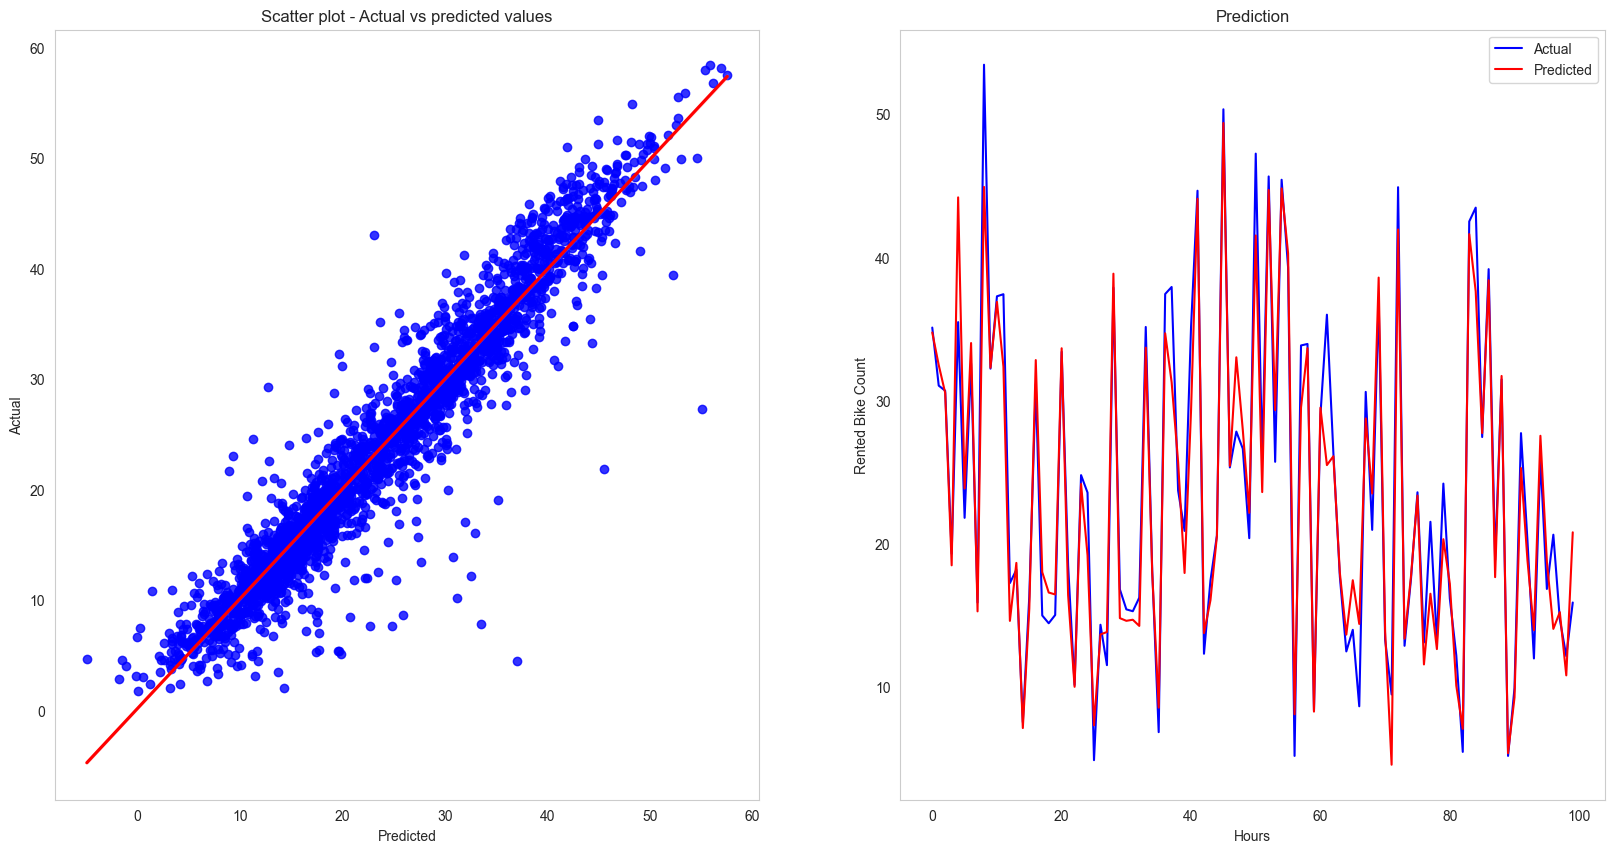

In [80]:
# Create and train the XGBoost Regressor model
xgb_model = XGBRegressor(n_estimators=500, random_state=42)
model_list.append('XGboost')
y_pred_xgboost = train_model(gb_model, x_train, y_train, x_test)
evaluate_performance(y_test, y_pred_xgboost)
plot(y_test, y_pred_xgboost)

Training Score: 0.9759089848302296
R2 Score: 0.9190931874433929
Mean Squared Error: 11.155611413096606


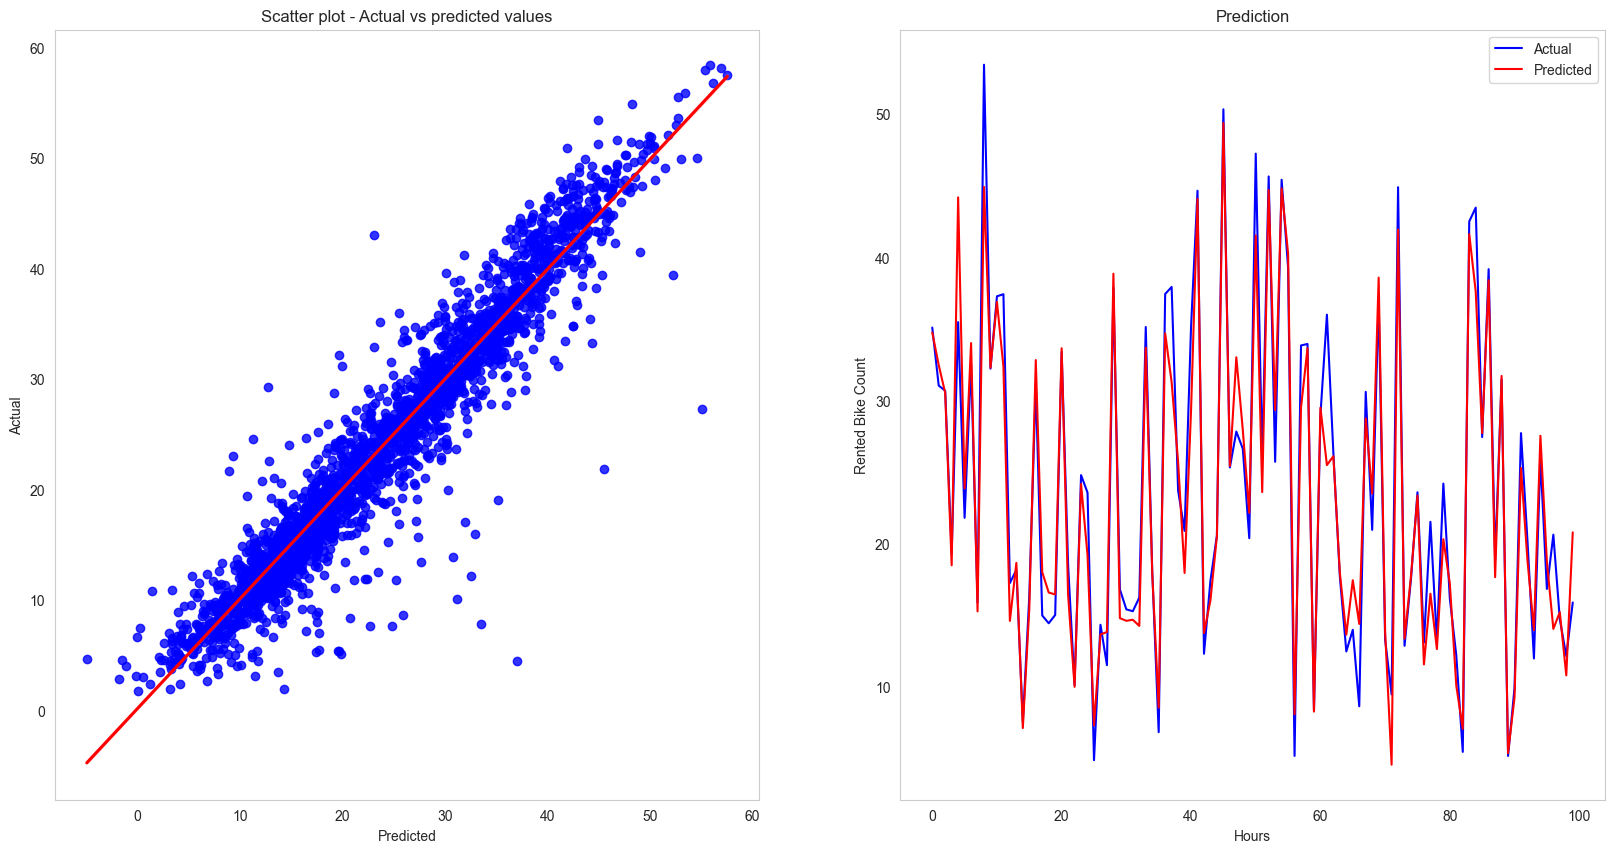

In [81]:
# Create and train the LightGBM Regressor model
lgbm_model = LGBMRegressor(n_estimators=500, random_state=42)
model_list.append('LightGBM')
y_pred_lgbm = train_model(gb_model, x_train, y_train, x_test)
evaluate_performance(y_test, y_pred_lgbm)
plot(y_test, y_pred_lgbm)

<h3 id="6m">Model Evaluation</h3>

For evaluating our models we will store all the results in a dataframe for better visualization. This will help us determine the model with the best performance so that we can apply it in our model deployment. 

In [82]:
# Store the result in a dataframe
metrics = {'Training Score':training_score, 'Mean Squared Error': mean_squared_error_list, "R2": r2_score_list}
results_df = pd.DataFrame(metrics, index=model_list)
results_df

Training Score  Mean Squared Error        R2
Linear Regression                  0.765062           33.988289  0.753498
Polynomial Regression              0.933361           16.304259  0.881752
Lasso Regression                   0.766272           33.743999  0.755269
Ridge Regression                   0.766265           33.733289  0.755347
Decision Tree Regressor            0.902042           29.437415  0.786503
Random Forest Regressor            0.987905           12.545970  0.909010
Gradient Boosting Regressor        0.975909           11.155611  0.919093
XGboost                            0.975909           11.155611  0.919093
LightGBM                           0.975909           11.155611  0.919093

To see the best model (model with the best performance) we can use a horizontal barplot to visualize it better.

In [83]:
# sort the models according to their performances
perf = results_df.sort_values("R2",ascending=False)
perf

Training Score  Mean Squared Error        R2
Gradient Boosting Regressor        0.975909           11.155611  0.919093
XGboost                            0.975909           11.155611  0.919093
LightGBM                           0.975909           11.155611  0.919093
Random Forest Regressor            0.987905           12.545970  0.909010
Polynomial Regression              0.933361           16.304259  0.881752
Decision Tree Regressor            0.902042           29.437415  0.786503
Ridge Regression                   0.766265           33.733289  0.755347
Lasso Regression                   0.766272           33.743999  0.755269
Linear Regression                  0.765062           33.988289  0.753498

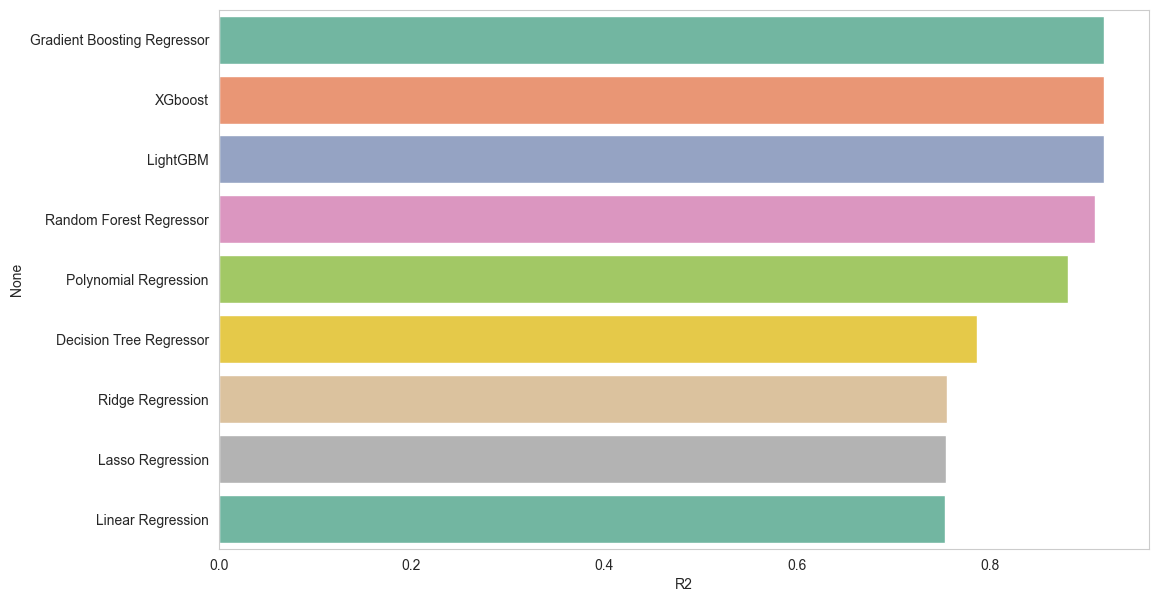

In [84]:
plt.figure(figsize=(12,7))
p = sns.barplot(x="R2",y=perf.index,data=perf,ci=None,palette="Set2")
plt.show()

The results are on the good side, the first 3 models are very close from each other and have the same training score of **0.98**. However for our model deployment using Flask we will choose the **Random Forest Regressor** as it has the best training accuracy. See you in the next section!

<style>
    h2{
        text-align: center;
        font-weight: bold;
        background-color: #00CED1;
        color: white;
        border-radius: 5px;
    
    }
</style>

<h2 id="7">Flask API for model deployment</h2>

From the model evaluation we choose the Random Forest Regression model as it has the best performance. We will now create a Flask API for this model. We will use the `pickle` module to save the model and the `flask` module to create the API. Pickle is used for serializing and de-serializing Python object structures. It's the process of converting a Python object into a byte stream to store it in a file/database, or transport data over the network.

To do so we created a file called app.py and created a html file called index.html to create a simple web page. We will use the `render_template()` method from the `flask` module to render the html file. We will also use the `request` module to get the data from the html form. To create the pickle file we have a file in our repository. `model.py` contains the code that we chose from our model evaluation and will train the model and save it as a pickle file. We will use the `load()` method from the `pickle` module to load the model and the `predict()` method to predict the number of bikes rented.